# Henry PROYECTO GRUPAL 2023 DTS06: Parte I Data Analytics
## ANÁLISIS EXPLORATORIO DE DATOS O EDA

### Students: 
              Aylin Veronica Sequera Celis
              Daniela Berenice Contreras Villafuerte
              Diego Marcelo Ledesma  
              Nelson Alejandro Castro Andrews
              Mónica virginia Ramos Dávila 


**Author:** [CONSULTORA GRUPO3](https://github.com/aylinv94/Flujos_Migratorios)<br>
**Date created:** 2023/02/10<br>
**Last modified:** 2022/02/14<br>
**Description:** Classify tabular data in a few lines of code.
              

# Structured data classification

## Introducción
Se muestra cómo realizamos la clasificación de datos estructurados (también conocida como clasificación de datos tabulares), a partir de un raw CSV. Nuestros datos incluyen características numéricas, y características categóricas enteras, y características categóricas de cadena. Usaremos la utilidad para indexar, preprocesar y codificar a partir de las Librerias:

sys / os / re / pandas / numpy / matplotlib.pyplot / matplotlib.ticker / ScalarFormatter / scipy.stats / scipy / requests / fastparquet / pyarrow / seaborn / sklearn.preprocessing import StandardScaler / sklearn.tree import DecisionTreeClassifier / sklearn.ensemble import / RandomForestClassifier / sklearn.datasets import load_iris / sklearn.metrics import mean_squared_error / sklearn.decomposition import PCA /  sklearn.pipeline import Pipeline / sklearn.preprocessing import PolynomialFeatures / sklearn.preprocessing import OneHotEncoder / sklearn.linear_model import LogisticRegression / sklearn.linear_model import LinearRegression / sklearn.model_selection import train_test_split / sklearn.metrics import mean_squared_error, r2_score / tensorflow / tensorflow import keras / geopy.geocoders import Nominatim / geopy.extra.rate_limiter import RateLimiter.

El código está adaptado según la Clasificación de datos estructurados desde cero. Mientras que en ocasiones administraremos su propio preprocesamiento de características de bajo nivel y codificación con capas de preprocesamiento Pandas, Numpy, Keras y sklearn, aqui estaremos  Delegando todo a , haciendo el flujo de trabajo extremadamente rápido y fácil.sklearn

Tenga en cuenta que este trabajo debe ejecutarse con TensorFlow 2.12 o superior. Antes del lanzamiento de TensorFlow 2.12, puede usar .tf-nightly

El conjunto de datos
Nuestro conjunto de datos es proporcionado por El Banco Mundial, La ONU y por el Arquitecto de Datos de la Consultora Grupo 3. son varios ArchivoS CSV correlacionados entre si por la naturaleza propio del estudio, cada dataframe posee filas. Cada fila contiene información sobre un año (una muestra), y cada columna describe un atributo flujo Migratorio (una característica), la cual optaremos por transformar ETL en su momento como Caracteristicas Categoricas. Nosotros Usaremos las funciones para predecir la proyección anual concluyendo si un Flujo Migratorio tiene una caracteristica Tipica o atipica (clasificación binaria).

Aquí está la descripción de cada característica:

Column| Description| Feature Type
------------|--------------------|----------------------
country_name | Nombre del Pais | Categorical
country_code | ("ABC"; Codigo Pais) | Categorical
net_migration_año | año (1990, hasta 2020) | Numerical
(ETL - train) p_target |Blanco del Minimo Flujo Migratorio (hig - medium - low) | Categorico
(ETL - train) Target | Blanco del Minimo Flujo Migratorio (Binario 1 = high - 0 = Low) | Categorico
(ETL - train) m2020 | Año muestral (hig - medium - low) | Categorico
(ETL - train) d20 | Año muestral (Binario 1 = high - 0 = Low) | Categorical
(ETL - train) m2019 | Año muestral (hig - medium - low) | Categorico
(ETL - train) d19 | Año muestral (Binario 1 = high - 0 = Low) | Categorical
(ETL - test) p2_target |Blanco del Minimo Flujo Migratorio (hig - medium - low) | Categorico
(ETL - test) target | Blanco del Minimo Flujo Migratorio (Binario 1 = high - 0 = Low) | Categorico
(ETL - test) lustro15 | Año muestral en lustro (hig - medium - low) | Categorico
(ETL - test) B15 | Año muestral en lustro (Binario 1 = high - 0 = Low) | Categorical
(ETL - test) lustro20 | Año muestral en lustro (hig - medium - low) | Categorico
(ETL - test) B20 | Año muestral en lustro (Binario 1 = high - 0 = Low) | Categorical


## ------------- D A T A --- E X P L O R A T I O N --- I --------------

In [44]:
# import holoviews as hv
# import hvplot.pandas
# import panel as pn
# import seaborn as sns
import sys
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import scipy.stats as sps
from scipy import stats
import requests as rts
import fastparquet as fpt
import pyarrow as pw
import seaborn as sns
pd.set_option("display.max_columns", 40)
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from geopy.geocoders import Nominatim 
from geopy.extra.rate_limiter import RateLimiter

In [45]:
pd.options.display.float_format = '{:,.0f}'.format

# warnings

In [46]:
import warnings

def disable_pandas_warnings():
    warnings.resetwarnings()  # Maybe somebody else is messing with the warnings system?
    warnings.filterwarnings('ignore')  # Ignore everything
    # ignore everything does not work: ignore specific messages, using regex
    warnings.filterwarnings('ignore', '.*A value is trying to be set on a copy of a slice from a DataFrame.*')
    warnings.filterwarnings('ignore', '.indexing past lexsort depth may impact performance')
disable_pandas_warnings()

### Ingesto el archivo tipo csv ('countries_net_migration.csv') con los datos de entrenamiento a utilizar en Pandas.

In [52]:
df = pd.read_csv('countries_net_migration.csv')
df.head(5)

,country_name,country_code,net_migration_1990,net_migration_1991,net_migration_1992,net_migration_1993,net_migration_1994,net_migration_1995,net_migration_1996,net_migration_1997,net_migration_1998,net_migration_1999,net_migration_2000,net_migration_2001,net_migration_2002,net_migration_2003,net_migration_2004,net_migration_2005,net_migration_2006,net_migration_2007,net_migration_2008,net_migration_2009,net_migration_2010,net_migration_2011,net_migration_2012,net_migration_2013,net_migration_2014,net_migration_2015,net_migration_2016,net_migration_2017,net_migration_2018,net_migration_2019,net_migration_2020
0,ARUBA,ABW,879,"1,946","1,294","1,662","1,668","1,598","1,636","1,656","1,786","1,828","1,235",560,350,324,315,579,569,621,666,703,498,315,229,134,88,177,170,218,367,412,0
1,AFGHANISTAN,AFG,"-666,001","39,926","1,834,556","1,171,818","665,410","71,824","27,194","6,129","35,740","85,758","-1,007,135","-192,286","1,327,074","388,632","-248,616","252,185","62,684","-942,887","221,000","-58,881","-141,355","418,796","105,905","48,076","255,611","-281,739","-90,238","-47,090","-47,205","-8,082","166,821"
2,ANGOLA,AGO,"47,663","33,925","39,196","38,883","45,272","40,855","45,356","49,960","51,856","51,687","53,527","56,959","60,505","59,438","66,585","64,009","70,170","73,940","73,804","77,265","90,016","94,709","96,056","91,528","84,532","74,170","91,623","77,733","61,632","58,986","7,557"
3,ALBANIA,ALB,"-52,723","-56,599","-59,634","-61,925","-63,700","-65,106","-65,800","-65,975","-65,616","-64,787","-63,610","-62,059","-59,876","-57,308","-54,383","-50,855","-47,174","-43,019","-38,736","-34,116","-29,330","-24,465","-19,946","-16,845","-14,265","-12,240","-10,887","-9,768","-9,106","-8,889","-9,117"
4,ANDORRA,AND,"1,589","1,501","1,446","1,530","1,474","1,588",182,140,183,39,146,"2,690","2,690","2,722","2,744","2,467","-2,420","-2,446","-2,584","-2,678","-2,864",27,33,12,-84,-232,"1,303",887,"1,184","1,238","1,474"


# Obtenemos informacion basica del dataframe

In [53]:
df.describe()

,net_migration_1990,net_migration_1991,net_migration_1992,net_migration_1993,net_migration_1994,net_migration_1995,net_migration_1996,net_migration_1997,net_migration_1998,net_migration_1999,net_migration_2000,net_migration_2001,net_migration_2002,net_migration_2003,net_migration_2004,net_migration_2005,net_migration_2006,net_migration_2007,net_migration_2008,net_migration_2009,net_migration_2010,net_migration_2011,net_migration_2012,net_migration_2013,net_migration_2014,net_migration_2015,net_migration_2016,net_migration_2017,net_migration_2018,net_migration_2019,net_migration_2020
count,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217
mean,194,150,167,201,204,175,168,137,46,69,65,-21,-30,-15,19,35,-10,-4,30,36,-10,-159,-143,-153,-176,-126,-125,-151,-152,-147,-135
std,"189,784","160,080","222,688","218,412","241,684","151,037","184,020","156,500","147,621","139,078","161,829","124,251","166,701","133,869","133,508","146,509","194,945","200,867","187,620","147,154","115,060","153,788","186,073","240,742","225,286","210,643","213,345","179,763","185,254","164,552","118,320"
min,"-1,196,051","-757,481","-1,320,633","-1,595,940","-2,162,873","-625,725","-777,896","-528,084","-448,726","-492,597","-1,007,135","-485,419","-834,546","-578,225","-535,175","-715,970","-1,204,180","-942,887","-1,390,782","-803,437","-462,265","-890,633","-1,647,986","-2,081,259","-2,037,911","-2,172,159","-2,290,411","-1,574,581","-1,356,759","-1,177,218","-1,025,295"
25%,"-12,986","-16,473","-20,270","-17,257","-21,003","-22,996","-22,473","-20,429","-21,441","-21,131","-21,139","-21,099","-20,530","-19,525","-18,142","-21,324","-26,641","-20,334","-24,037","-27,364","-24,663","-20,040","-20,983","-16,845","-20,445","-16,833","-13,520","-13,082","-14,451","-16,270","-9,189"
50%,-666,-526,-516,-522,-802,-763,-754,-821,-767,-734,"-1,158",-603,"-1,041",-386,-349,-630,"-1,072","-1,316","-1,265","-1,306","-1,527",-934,-880,-899,-799,-866,-374,-403,-807,"-1,296",-297
75%,"4,605","5,419","7,113","8,887","5,091","6,465","5,469","6,023","6,378","5,728","5,516","7,631","5,996","11,140","10,103","9,794","12,217","8,476","9,587","7,978","7,793","7,057","9,009","10,496","7,105","7,934","13,251","9,563","10,096","4,948","2,573"
max,"1,421,775","1,569,223","1,834,556","1,752,153","1,806,698","1,678,815","1,771,618","1,866,819","1,799,996","1,667,953","1,479,676","1,335,725","1,327,074","1,074,728","1,200,409","1,129,462","1,113,259","1,108,509","1,095,864","1,031,010","1,030,731","1,322,433","1,323,368","1,320,840","1,250,914","1,221,849","1,449,371","1,377,630","1,200,796","1,158,444","675,560"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country_name        217 non-null    object 
 1   country_code        217 non-null    object 
 2   net_migration_1990  217 non-null    float64
 3   net_migration_1991  217 non-null    float64
 4   net_migration_1992  217 non-null    float64
 5   net_migration_1993  217 non-null    float64
 6   net_migration_1994  217 non-null    float64
 7   net_migration_1995  217 non-null    float64
 8   net_migration_1996  217 non-null    float64
 9   net_migration_1997  217 non-null    float64
 10  net_migration_1998  217 non-null    float64
 11  net_migration_1999  217 non-null    float64
 12  net_migration_2000  217 non-null    float64
 13  net_migration_2001  217 non-null    float64
 14  net_migration_2002  217 non-null    float64
 15  net_migration_2003  217 non-null    float64
 16  net_migr

# Ahora obtenemos información básica sobre el DataFrame, junto con el valor medio de la característica que usaremos para crear la columna de destino

In [54]:
df.columns

Index(['country_name', 'country_code', 'net_migration_1990',
       'net_migration_1991', 'net_migration_1992', 'net_migration_1993',
       'net_migration_1994', 'net_migration_1995', 'net_migration_1996',
       'net_migration_1997', 'net_migration_1998', 'net_migration_1999',
       'net_migration_2000', 'net_migration_2001', 'net_migration_2002',
       'net_migration_2003', 'net_migration_2004', 'net_migration_2005',
       'net_migration_2006', 'net_migration_2007', 'net_migration_2008',
       'net_migration_2009', 'net_migration_2010', 'net_migration_2011',
       'net_migration_2012', 'net_migration_2013', 'net_migration_2014',
       'net_migration_2015', 'net_migration_2016', 'net_migration_2017',
       'net_migration_2018', 'net_migration_2019', 'net_migration_2020'],
      dtype='object')

# Eliminacion por cada columna

In [11]:
df.drop_duplicates(subset=["net_migration_1990"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_1991"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_1992"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_1993"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_1994"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_1995"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_1996"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_1997"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_1998"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_1999"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_2000"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_2001"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_2002"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_2003"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_2004"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_2005"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_2006"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_2007"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_2008"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_2009"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_2010"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_2011"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_2012"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_2013"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_2014"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_2015"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_2016"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_2017"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_2018"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_2019"], inplace=True, keep='first')
df.drop_duplicates(subset=["net_migration_2020"], inplace=True, keep='first')
print(df)

     country_name country_code  net_migration_1990  net_migration_1991  \
0           ARUBA          ABW                 879               1,946   
1     AFGHANISTAN          AFG            -666,001              39,926   
2          ANGOLA          AGO              47,663              33,925   
3         ALBANIA          ALB             -52,723             -56,599   
4         ANDORRA          AND               1,589               1,501   
..            ...          ...                 ...                 ...   
212        KOSOVO          XKX              -8,387              -3,473   
213   YEMEN, REP.          YEM             -15,868             -14,971   
214  SOUTH AFRICA          ZAF             231,224              12,361   
215        ZAMBIA          ZMB             -40,900             -44,211   
216      ZIMBABWE          ZWE               2,355                 998   

     net_migration_1992  net_migration_1993  net_migration_1994  \
0                 1,294               1,662 

### Buscando Valores Nulos

In [55]:
df.isna().any().sum()

0

In [56]:
df.isnull().sum()

country_name          0
country_code          0
net_migration_1990    0
net_migration_1991    0
net_migration_1992    0
net_migration_1993    0
net_migration_1994    0
net_migration_1995    0
net_migration_1996    0
net_migration_1997    0
net_migration_1998    0
net_migration_1999    0
net_migration_2000    0
net_migration_2001    0
net_migration_2002    0
net_migration_2003    0
net_migration_2004    0
net_migration_2005    0
net_migration_2006    0
net_migration_2007    0
net_migration_2008    0
net_migration_2009    0
net_migration_2010    0
net_migration_2011    0
net_migration_2012    0
net_migration_2013    0
net_migration_2014    0
net_migration_2015    0
net_migration_2016    0
net_migration_2017    0
net_migration_2018    0
net_migration_2019    0
net_migration_2020    0
dtype: int64

In [57]:
# # Esta función traza tanto un histograma como un diagrama de caja de un campo dado de un marco de datos.
# def plot_box_hist(data, field):
    
#     boxplot = data[field].hvplot(kind = 'box', invert = True, xformatter='%.0f', grid = True, box_fill_color = 'purple',
#                                  colorbar=True, title = field , width= 450).options(xrotation = 30)
    
#     histplot = data[field].hvplot.hist(field, width=450, bins = 30, grid = True, xformatter='%.0f',yformatter='%.0f',
#                                    colorbar=True,fill_color = 'purple',
#                                    title = field).options(xrotation = 30)
    
#     return boxplot + histplot

In [58]:
# plot_box_hist(df,'net_migration_1991')

## Distribución de la migración en el mundo, por países.

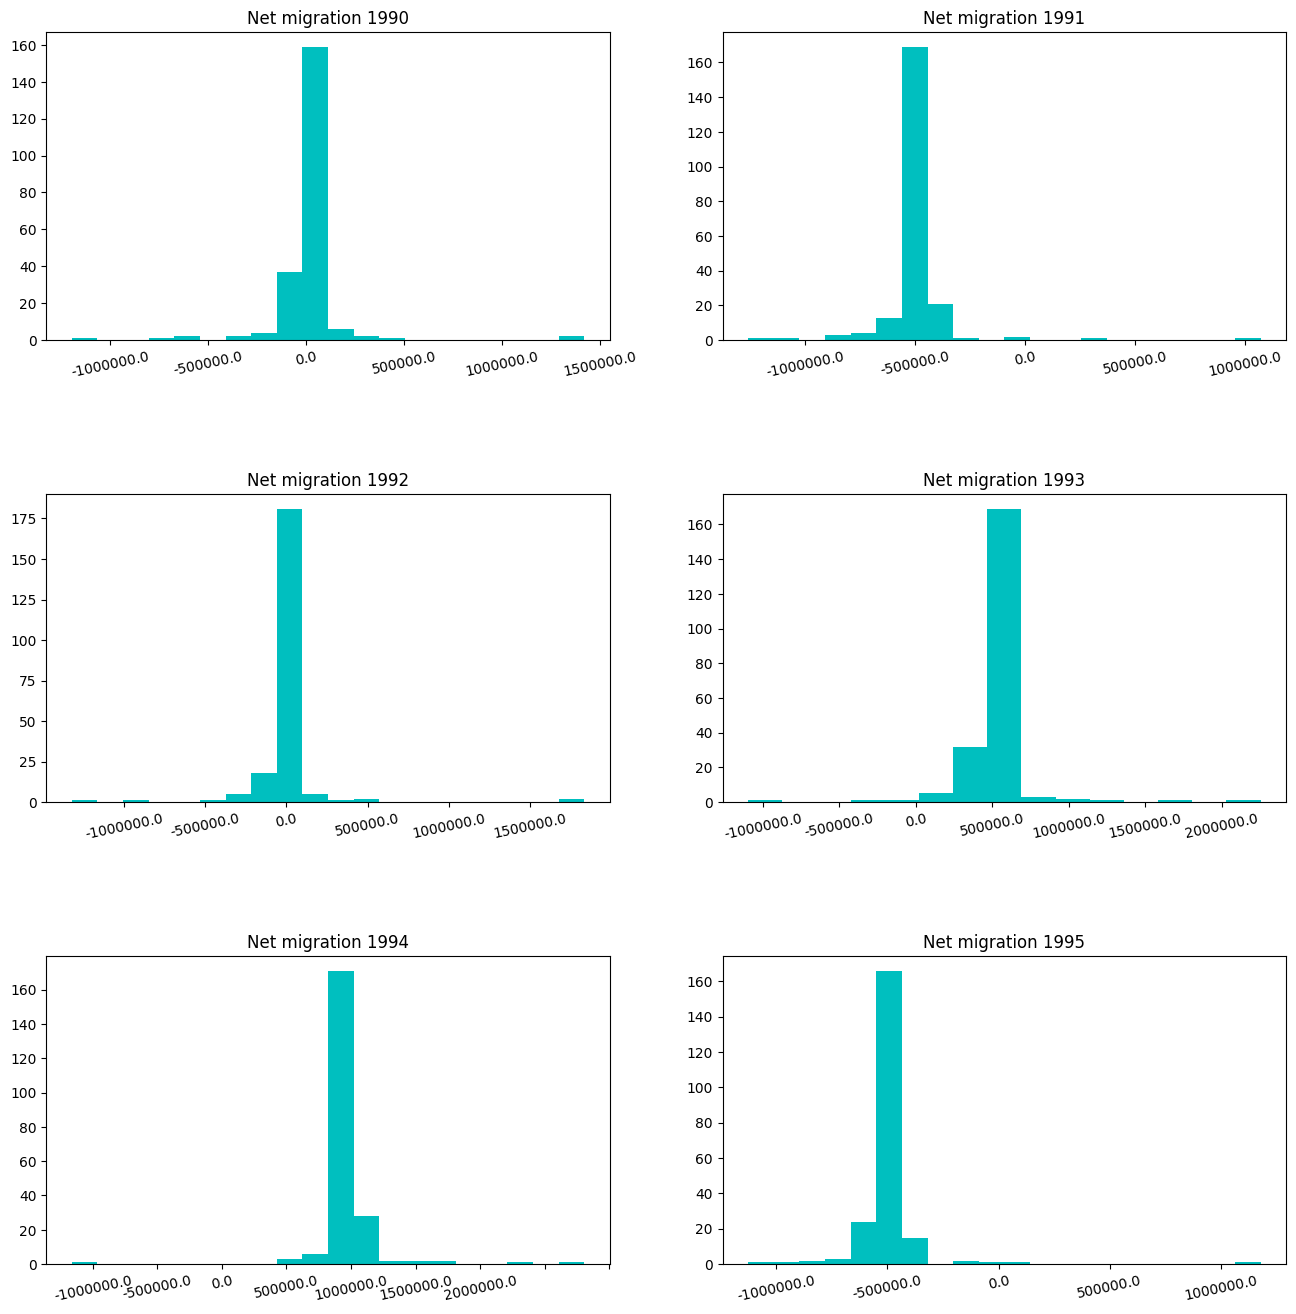

In [59]:
# Crear el gráfico
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 16) )

# First subplot 
ax[0,0].hist(df.net_migration_1990, bins=20, color='c')
ax[0,0].set_title("Net migration 1990")
ax[0,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[0,0].ticklabel_format(style='plain', axis='y')
ax[0,0].ticklabel_format(style='plain', axis='x')
ax[0,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# Second subplot 
ax[0,1].hist(df.net_migration_1991, bins=20, color='c')
ax[0,1].set_title("Net migration 1991")
ax[0,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[0,1].ticklabel_format(style='plain', axis='y')
ax[0,1].ticklabel_format(style='plain', axis='x')
ax[0,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# Third subplot
ax[1,0].hist(df.net_migration_1992, bins=20, color='c')
ax[1,0].set_title("Net migration 1992")
ax[1,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[1,0].ticklabel_format(style='plain', axis='y')
ax[1,0].ticklabel_format(style='plain', axis='x')
ax[1,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# forth subplot - Histograma
ax[1,1].hist(df.net_migration_1993, bins=15, color='c')
ax[1,1].set_title("Net migration 1993")
ax[1,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[1,1].ticklabel_format(style='plain', axis='y')
ax[1,1].ticklabel_format(style='plain', axis='x')
ax[1,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# 5
ax[2,0].hist(df.net_migration_1994, bins=20, color='c')
ax[2,0].set_title("Net migration 1994")
ax[2,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[2,0].ticklabel_format(style='plain', axis='y')
ax[2,0].ticklabel_format(style='plain', axis='x')
ax[2,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# 6 
ax[2,1].hist(df.net_migration_1995, bins=20, color='c')
ax[2,1].set_title("Net migration 1995")
ax[2,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[2,1].ticklabel_format(style='plain', axis='y')
ax[2,1].ticklabel_format(style='plain', axis='x')
ax[2,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)





fig.subplots_adjust(hspace=0.5)

# Show the graphs
plt.show()

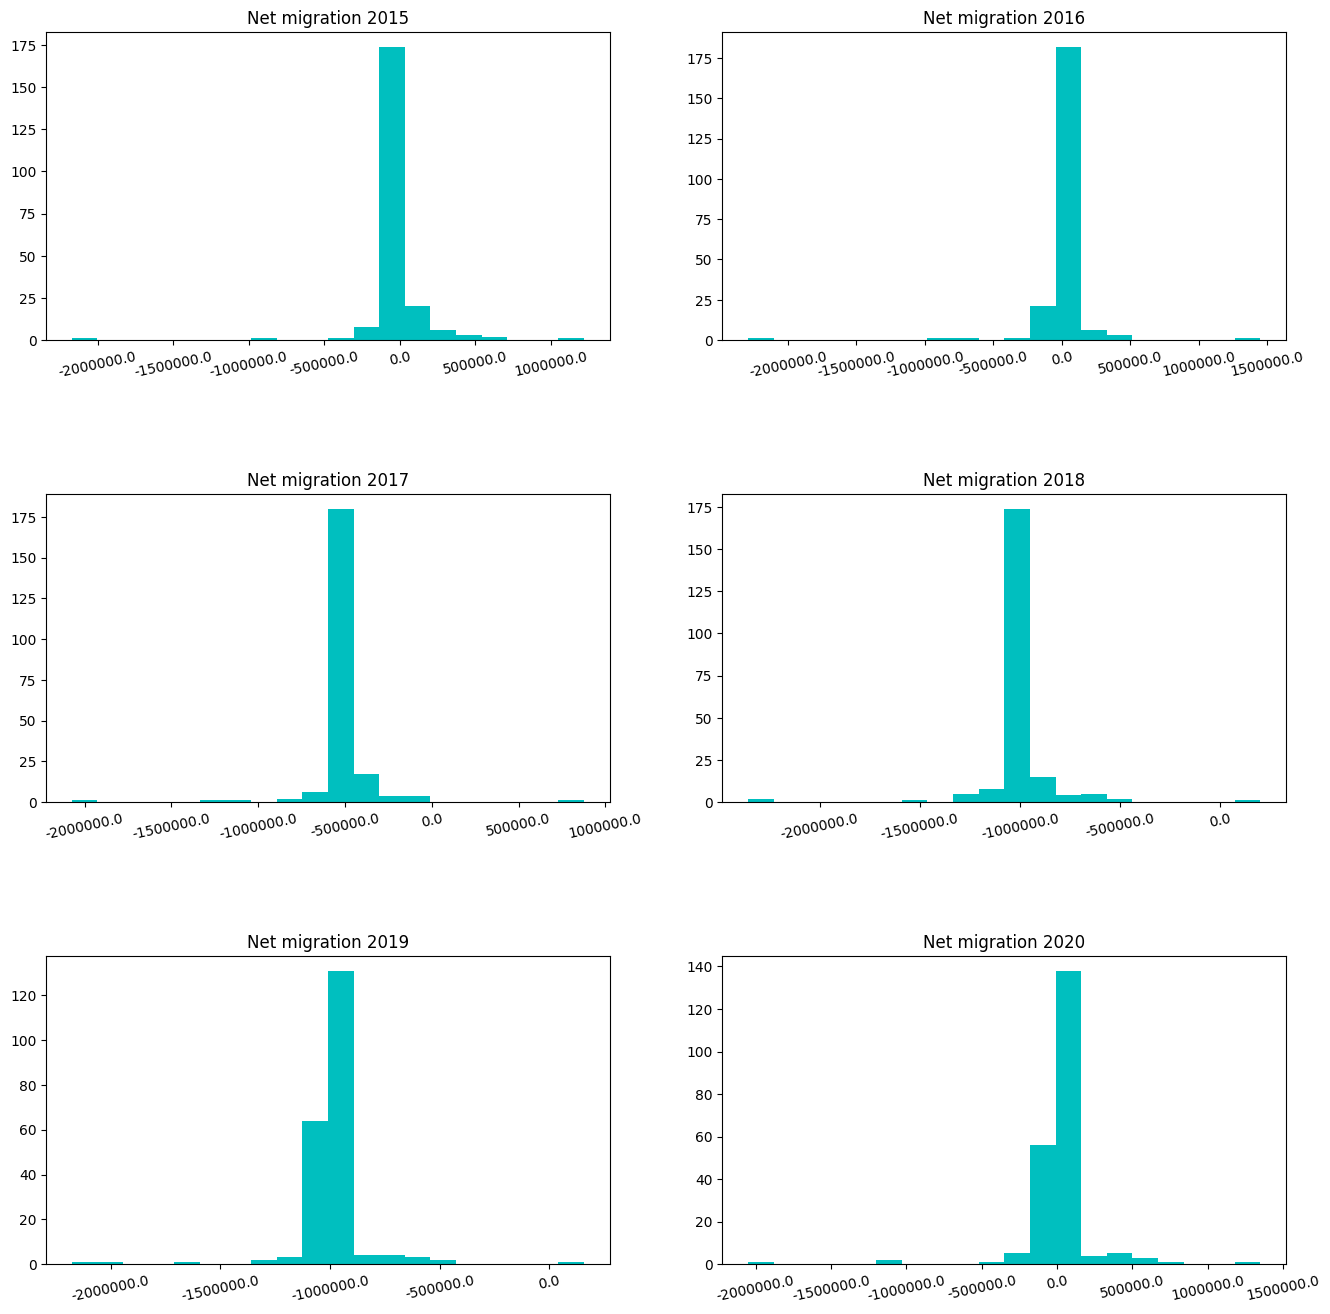

In [60]:
# Crear el gráfico
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 16) )

ax[0,0].hist(df.net_migration_2015, bins=20, color='c')
ax[0,0].set_title("Net migration 2015")
ax[0,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[0,0].ticklabel_format(style='plain', axis='y')
ax[0,0].ticklabel_format(style='plain', axis='x')
ax[0,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# 6 
ax[0,1].hist(df.net_migration_2016, bins=20, color='c')
ax[0,1].set_title("Net migration 2016")
ax[0,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[0,1].ticklabel_format(style='plain', axis='y')
ax[0,1].ticklabel_format(style='plain', axis='x')
ax[0,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

ax[1,0].hist(df.net_migration_2017, bins=20, color='c')
ax[1,0].set_title("Net migration 2017")
ax[1,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[1,0].ticklabel_format(style='plain', axis='y')
ax[1,0].ticklabel_format(style='plain', axis='x')
ax[1,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)


ax[1,1].hist(df.net_migration_2018, bins=20, color='c')
ax[1,1].set_title("Net migration 2018")
ax[1,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[1,1].ticklabel_format(style='plain', axis='y')
ax[1,1].ticklabel_format(style='plain', axis='x')
ax[1,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

ax[2,0].hist(df.net_migration_2019, bins=20, color='c')
ax[2,0].set_title("Net migration 2019")
ax[2,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[2,0].ticklabel_format(style='plain', axis='y')
ax[2,0].ticklabel_format(style='plain', axis='x')
ax[2,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)


ax[2,1].hist(df.net_migration_2020, bins=20, color='c')
ax[2,1].set_title("Net migration 2020")
ax[2,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[2,1].ticklabel_format(style='plain', axis='y')
ax[2,1].ticklabel_format(style='plain', axis='x')
ax[2,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)



fig.subplots_adjust(hspace=0.5)

# Show the graphs
plt.show()

Aunque tuvimos que seleccionar algunos años, podemos notar un par de cosas. Primero, la forma general de la distribución se mantiene prácticamente igual a lo largo del período estudiado. En segundo lugar, el pico en el centro de la distribución se ha vuelto más alto a lo largo de los años. En tercer lugar, con el tiempo el número de migrantes parece haber aumentado. Podemos ver esto en las colas de la distribución. Cuarto, el número de migraciones netas a la derecha de los últimos gráficos ha disminuido drásticamente. Nos inclinamos a pensar que esto se debe a la dificultad de obtener los datos.

Text(0, 0.5, 'total')

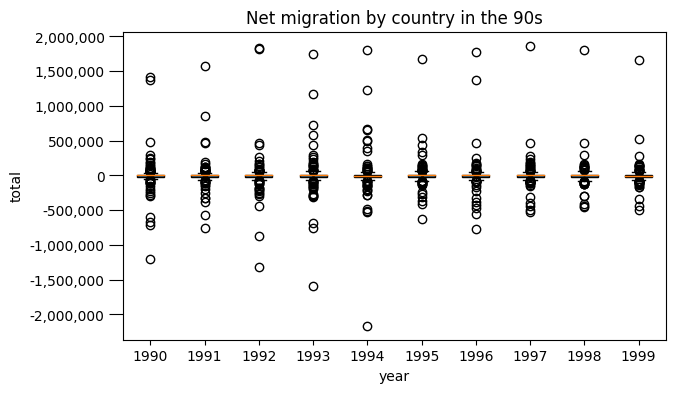

In [18]:
fig, ax = plt.subplots(figsize = (7,4))
bp1 = ax.boxplot([df.net_migration_1990, df.net_migration_1991, df.net_migration_1992, df.net_migration_1993,
                 df.net_migration_1994, df.net_migration_1995, df.net_migration_1996, df.net_migration_1997,
                  df.net_migration_1998,
                 df.net_migration_1999],
                 patch_artist=True,
                 labels=['1990','1991', '1992', '1993', '1994','1995','1996', '1997', '1998', '1999'])
ax.yaxis.set_tick_params(tickdir='out', length=10)
ax.yaxis.set_ticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])

plt.title("Net migration by country in the 90s")
plt.xlabel("year")
plt.ylabel("total")

Text(0, 0.5, 'total')

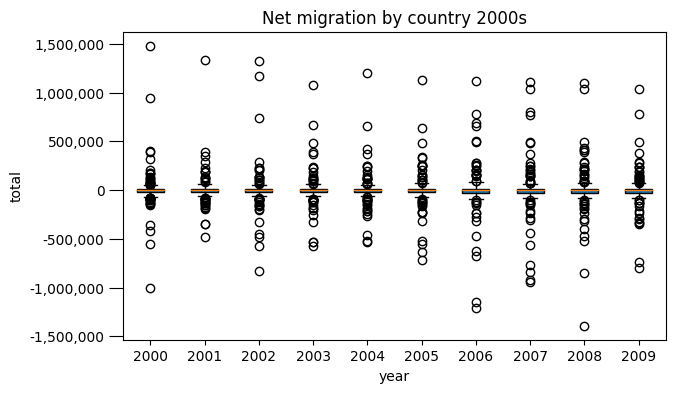

In [19]:
fig, ax = plt.subplots(figsize = (7,4))
bp1 = ax.boxplot([df.net_migration_2000, df.net_migration_2001, df.net_migration_2002, df.net_migration_2003,
                 df.net_migration_2004, df.net_migration_2005, df.net_migration_2006, df.net_migration_2007,
                  df.net_migration_2008, df.net_migration_2009],
                 patch_artist=True,
                 labels=['2000','2001', '2002', '2003', '2004','2005','2006', '2007', '2008', '2009'])
ax.yaxis.set_tick_params(tickdir='out', length=10)
ax.yaxis.set_ticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])

plt.title("Net migration by country 2000s")
plt.xlabel("year")
plt.ylabel("total")

Text(0, 0.5, 'total')

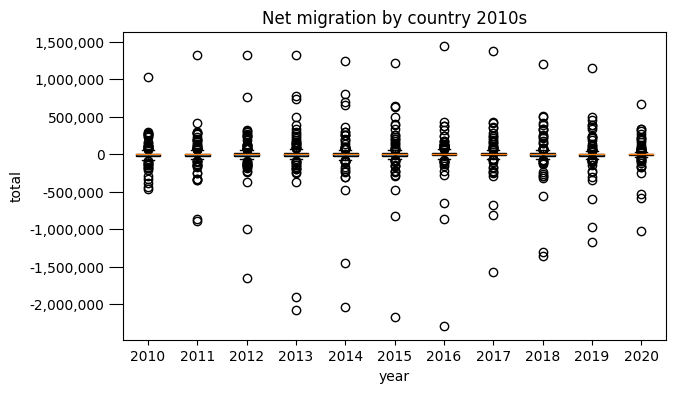

In [20]:
fig, ax = plt.subplots(figsize = (7,4))
bp1 = ax.boxplot([df.net_migration_2010, df.net_migration_2011, df.net_migration_2012, df.net_migration_2013,
                 df.net_migration_2014, df.net_migration_2015, df.net_migration_2016, df.net_migration_2017,
                  df.net_migration_2018, df.net_migration_2019, df.net_migration_2020],
                 patch_artist=True,
                 labels=['2010','2011', '2012', '2013', '2014','2015','2016', '2017', '2018', '2019','2020'])
ax.yaxis.set_tick_params(tickdir='out', length=10)
ax.yaxis.set_ticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])

plt.title("Net migration by country 2010s")
plt.xlabel("year")
plt.ylabel("total")

Podemos observar la presencia constante de valores atípicos en nuestro conjunto de datos. Eso podría deberse a las diferencias en el tamaño de la población. No trataremos estos valores atípicos todavía, para no pasar por alto este hecho.

## Countries with the higher net migration

In [21]:
filtered = df.sort_values(by=['net_migration_2020'], ascending = False).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.net_migration_2020.tolist()

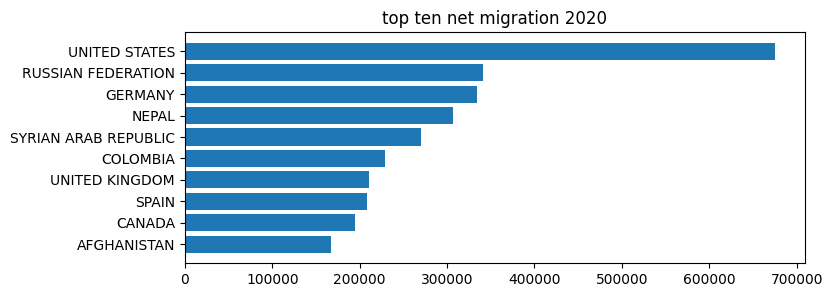

In [22]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8,9]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize= (8,3))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# Invert the y axis
ax.invert_yaxis()
# title
plt.title("top ten net migration 2020")
# plot
plt.show()

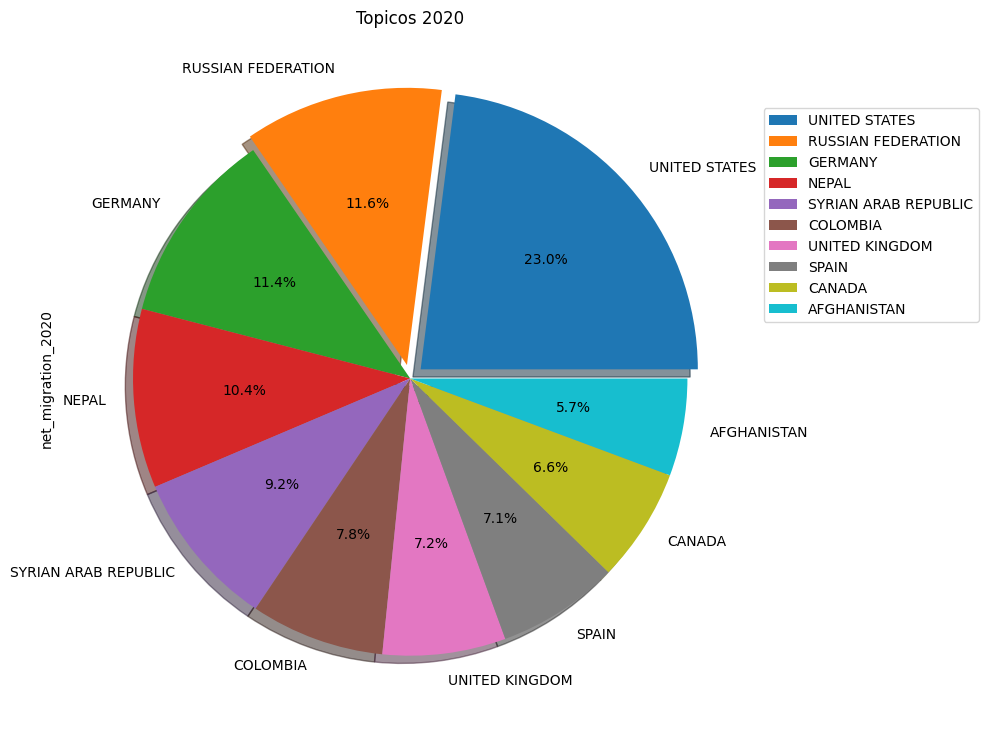

In [23]:
toptensubjects = df.groupby(by='country_name').net_migration_2020.sum().sort_values(ascending=False).head(10)
ax = toptensubjects.plot.pie(title="Topicos 2020",figsize=(16,9),shadow=True, autopct='%1.1f%%', explode=[0.05,0.05,0,0,0,0,0,0,0,0], legend=True)
ax.legend(bbox_to_anchor=(1, 0.9), loc='upper left')

In [24]:
filtered = df.sort_values(by=['net_migration_2019'], ascending = False).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.net_migration_2019.tolist()

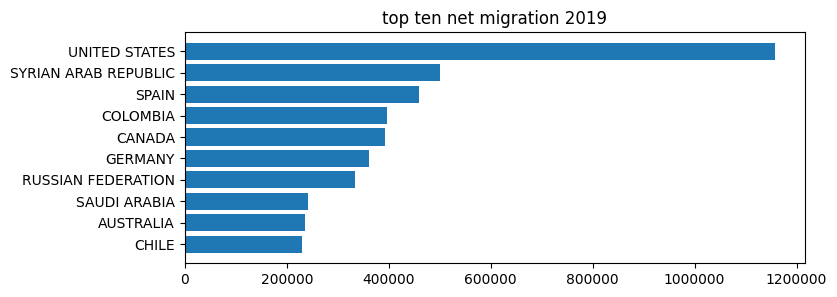

In [25]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8,9]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize= (8,3))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# Invert the y axis
ax.invert_yaxis()

# supress scientific notation
ax.ticklabel_format(style='plain', axis='x')

# title
plt.title("top ten net migration 2019")
# plot
plt.show()

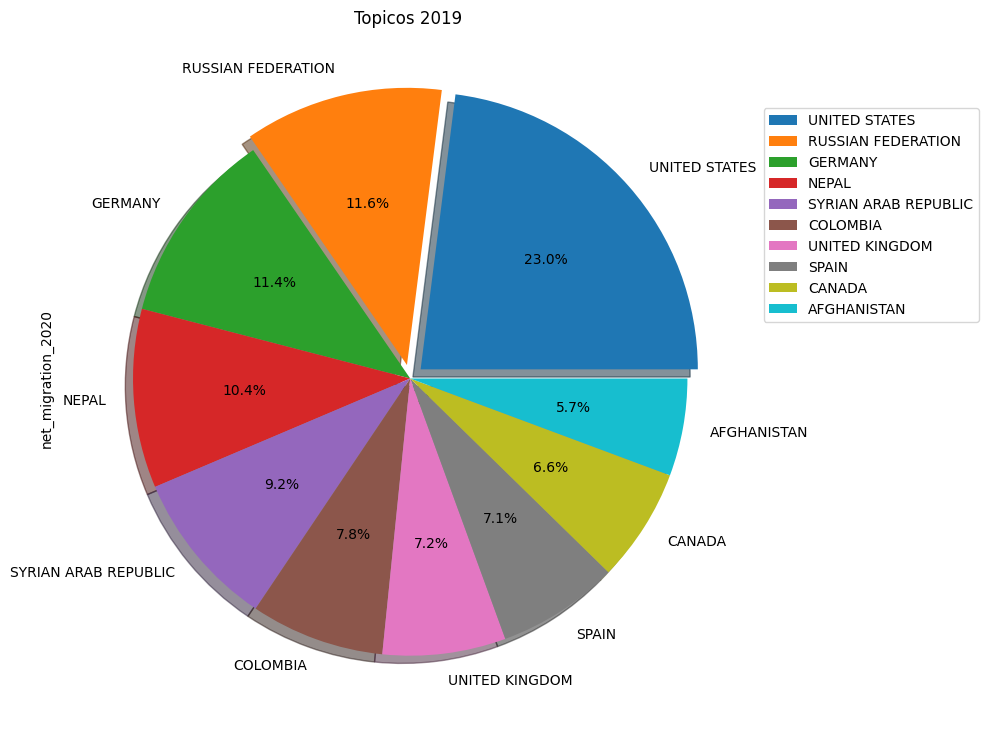

In [26]:
toptensubjects = df.groupby(by='country_name').net_migration_2020.sum().sort_values(ascending=False).head(10)
ax = toptensubjects.plot.pie(title="Topicos 2019 ",figsize=(16,9),shadow=True, autopct='%1.1f%%', explode=[0.05,0.05,0,0,0,0,0,0,0,0], legend=True)
ax.legend(bbox_to_anchor=(1, 0.9), loc='upper left')

In [27]:
filtered = df.sort_values(by=['net_migration_2018'], ascending = False).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.net_migration_2018.tolist()

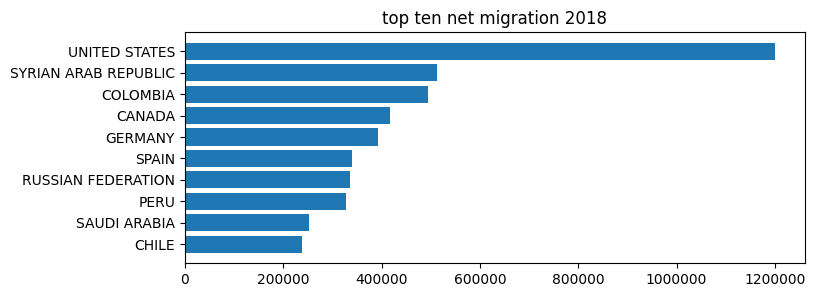

In [28]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8,9]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize= (8,3))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# Invert the y axis
ax.invert_yaxis()
# supress scientific notation
ax.ticklabel_format(style='plain', axis='x')
# title
plt.title("top ten net migration 2018")
# plot
plt.show()

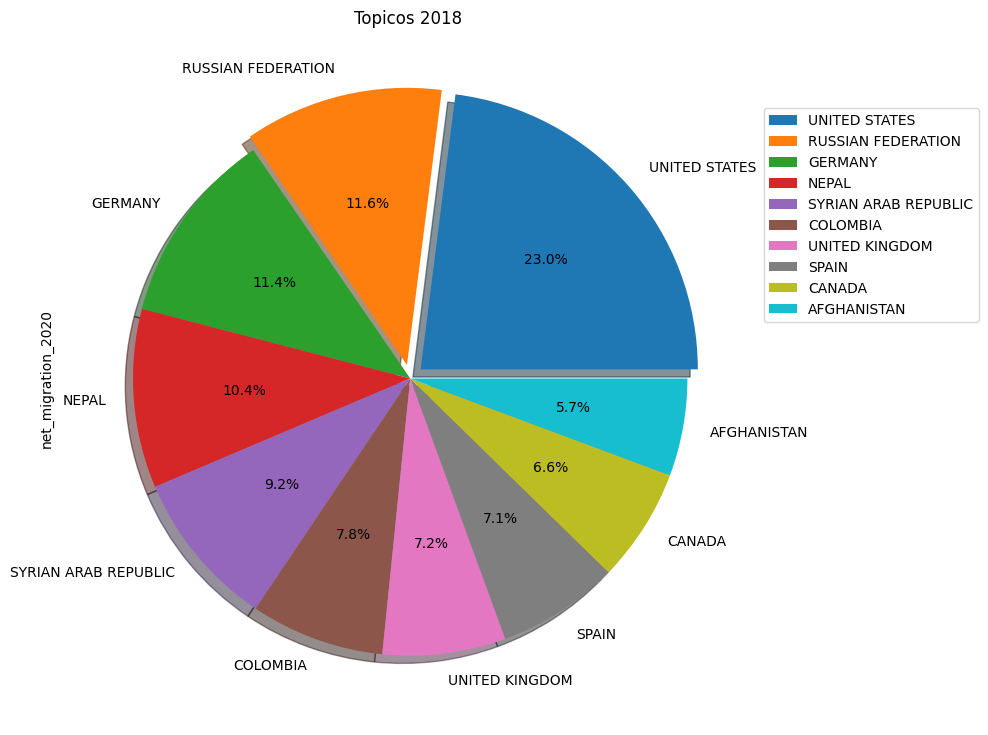

In [29]:
toptensubjects = df.groupby(by='country_name').net_migration_2020.sum().sort_values(ascending=False).head(10)
ax = toptensubjects.plot.pie(title="Topicos 2018 ",figsize=(16,9),shadow=True, autopct='%1.1f%%', explode=[0.05,0.05,0,0,0,0,0,0,0,0], legend=True)
ax.legend(bbox_to_anchor=(1, 0.9), loc='upper left')

### Países con menor migración neta

In [61]:
filtered = df.sort_values(by=['net_migration_2020'], ascending = True).reset_index(drop=True).iloc[0:10]

In [62]:
countries = filtered.country_name.tolist()

In [63]:
values = filtered.net_migration_2020.tolist()

In [65]:
df.sort_values(by='net_migration_2020', ascending=True).head(10)

,country_name,country_code,net_migration_1990,net_migration_1991,net_migration_1992,net_migration_1993,net_migration_1994,net_migration_1995,net_migration_1996,net_migration_1997,net_migration_1998,net_migration_1999,net_migration_2000,net_migration_2001,net_migration_2002,net_migration_2003,net_migration_2004,net_migration_2005,net_migration_2006,net_migration_2007,net_migration_2008,net_migration_2009,net_migration_2010,net_migration_2011,net_migration_2012,net_migration_2013,net_migration_2014,net_migration_2015,net_migration_2016,net_migration_2017,net_migration_2018,net_migration_2019,net_migration_2020
167,SAUDI ARABIA,SAU,"186,898","165,010","130,258","31,317","35,332","27,095","29,773","31,781","29,767","24,400","17,241","19,616","22,830","17,278","10,112","481,349","490,805","495,746","495,131","494,189","236,962","94,083","88,879","77,738","65,520","60,337","171,429","282,947","253,245","241,172","-1,025,295"
150,PAKISTAN,PAK,"30,184","-6,127","-1,320,633",-278,"-276,644","296,208","147,987","151,546","148,849","148,403","940,739","344,288","-834,546","-578,225","-524,871","-632,467","-628,923","-563,471","-525,915","-338,507","-431,891","-890,633","-1,647,986","-1,906,315","-2,037,911","-2,172,159","-2,290,411","-1,574,581","-1,309,609","-1,177,218","-588,736"
206,"VENEZUELA, RB",VEN,-80,-241,-388,-487,-567,-633,-717,-825,"-1,013","-1,388","-2,004","-2,852","-3,934","-5,730","-10,798","-18,400","-27,239","-36,052","-43,636","-50,286","-52,784","-54,377","-55,130","-57,815","-62,437","-77,421","-283,326","-817,764","-1,356,759","-976,460","-525,142"
106,KUWAIT,KWT,"-1,196,051","460,628","52,620","-44,820","-42,817","1,693","20,602","20,792","20,819","20,438","19,193","17,088","14,550","11,232","7,427","68,878","96,486","94,844","93,141","90,945","94,736","191,544","191,164","190,228","-84,910","259,114","-90,785","140,685","144,967","9,088","-254,177"
149,OMAN,OMN,"33,492","33,643","33,345","28,131","-14,802","-15,515","-16,769","-17,943","-19,193","-20,097","-19,889","-20,234","-20,634","-20,635",-855,-630,-398,-755,"-2,491","-4,718","264,095","266,486","262,093","161,176","75,961","134,260","118,472","5,777","-51,177","-106,864","-164,408"
163,QATAR,QAT,"5,021","5,494","5,451","5,250","5,106","4,893","4,552","19,387","22,500","22,364","22,039","21,641","24,200","23,444","12,430","106,609","203,572","206,156","192,654","111,510","64,531","82,815","83,444","137,597","179,768","178,133","138,455","46,900","11,662","15,493","-163,999"
91,"IRAN, ISLAMIC REP.",IRN,"1,375,419","194,979","-203,400","-1,595,940","-197,490","-120,114","7,728","198,135","288,994","277,986","394,594","393,336","-568,950","370,945","369,535","323,987","252,053","139,826","90,815","99,224","127,703","-150,029","19,635","23,351","653,255","628,310","23,759","7,709","-29,981","-34,571","-156,669"
108,LEBANON,LBN,"-6,595","1,159",-970,"-5,196","-4,850","2,634","3,164","1,313","1,062","2,589",455,"-1,094","-21,543","1,674","4,974","1,224","25,126","27,944",430,"-2,700","-40,915","2,246","124,428","733,504","301,113","-223,722","-228,173","-230,947","-233,520","-237,572","-115,146"
113,SRI LANKA,LKA,"-36,199","-42,400","-48,501","-54,206","-63,104","-73,695","-83,689","-90,691","-92,990","-92,896","-91,900","-15,604","-20,309","-20,932","-1,028","-36,955","-23,795","-19,572","-11,557","5,484","-26,603","-13,277","-97,095","-97,189","-97,807","-98,598","-98,896","-98,598","-97,100","-94,897","-92,400"
213,"YEMEN, REP.",YEM,"-15,868","-14,971","-14,380","-14,335","-13,045","-55,482","-75,067","-76,708","-79,125","-82,761","-87,753","-93,742","-99,706","-104,794","-102,701","-51,360","-24,072","-26,971","-28,242","-27,870","-25,573","-21,770","-20,983","-23,747","-30,048","-38,355","-39,688","-39,672","-39,699","-39,769","-86,100"


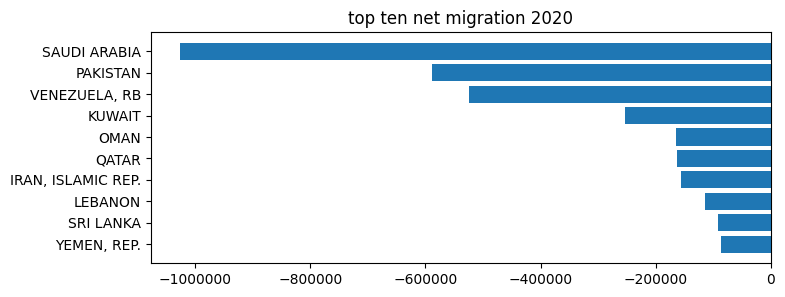

In [66]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8,9]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize=(8,3))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# supress scientific notation
ax.ticklabel_format(style='plain', axis='x')
# Invert the y axis
ax.invert_yaxis()

# title
plt.title("top ten net migration 2020")
# plot
plt.show()

In [67]:
filtered = df.sort_values(by=['net_migration_2019'], ascending = True).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.net_migration_2019.tolist()

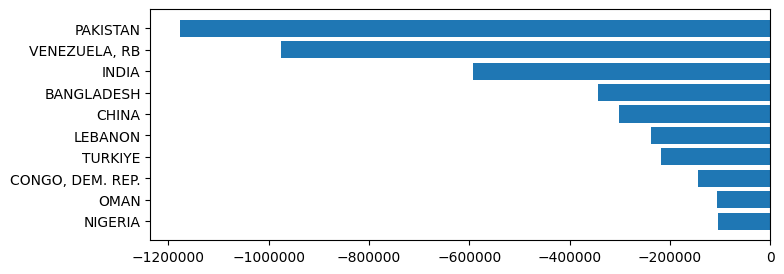

In [68]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8,9]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize=(8,3))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# supress scientific notation
ax.ticklabel_format(style='plain', axis='x')
# Invert the y axis
ax.invert_yaxis()

# plot
plt.show()

In [69]:
filtered = df.sort_values(by=['net_migration_2018'], ascending = True).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.net_migration_2018.tolist()

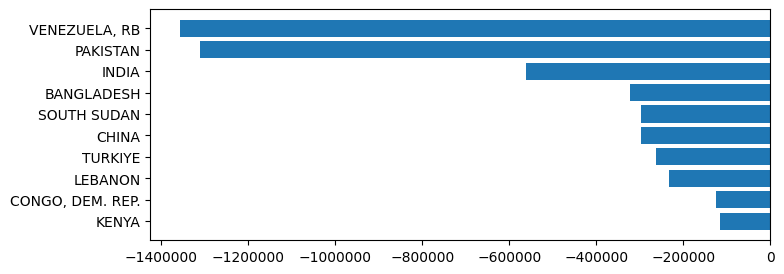

In [70]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8,9]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize=(8,3))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# supress scientific notation
ax.ticklabel_format(style='plain', axis='x')
# Invert the y axis
ax.invert_yaxis()

# plot
plt.show()

In [71]:
df.net_migration_2020.value_counts()

0          14
291         2
-4,301      1
-4,403      1
-4,824      1
           ..
-150        1
-23,142     1
-244        1
802         1
-29,955     1
Name: net_migration_2020, Length: 203, dtype: int64

In [72]:
# Como NO notamos que algunas columnas tienen '?' imputado donde falta un valor, contamos los valores faltantes reales
for x in df:
    res = False
    cnt = 0
    for y in df[x]:
        if y == '?':
            res = True
            cnt += 1
    print(f"{x} contains '?': {res} ({cnt})")

country_name contains '?': False (0)
country_code contains '?': False (0)
net_migration_1990 contains '?': False (0)
net_migration_1991 contains '?': False (0)
net_migration_1992 contains '?': False (0)
net_migration_1993 contains '?': False (0)
net_migration_1994 contains '?': False (0)
net_migration_1995 contains '?': False (0)
net_migration_1996 contains '?': False (0)
net_migration_1997 contains '?': False (0)
net_migration_1998 contains '?': False (0)
net_migration_1999 contains '?': False (0)
net_migration_2000 contains '?': False (0)
net_migration_2001 contains '?': False (0)
net_migration_2002 contains '?': False (0)
net_migration_2003 contains '?': False (0)
net_migration_2004 contains '?': False (0)
net_migration_2005 contains '?': False (0)
net_migration_2006 contains '?': False (0)
net_migration_2007 contains '?': False (0)
net_migration_2008 contains '?': False (0)
net_migration_2009 contains '?': False (0)
net_migration_2010 contains '?': False (0)
net_migration_2011 cont

# CORRELACION

In [41]:
df.corr()

,net_migration_1990,net_migration_1991,net_migration_1992,net_migration_1993,net_migration_1994,net_migration_1995,net_migration_1996,net_migration_1997,net_migration_1998,net_migration_1999,net_migration_2000,net_migration_2001,net_migration_2002,net_migration_2003,net_migration_2004,net_migration_2005,net_migration_2006,net_migration_2007,net_migration_2008,net_migration_2009,net_migration_2010,net_migration_2011,net_migration_2012,net_migration_2013,net_migration_2014,net_migration_2015,net_migration_2016,net_migration_2017,net_migration_2018,net_migration_2019,net_migration_2020
net_migration_1990,1,1,0,0,0,0,0,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
net_migration_1991,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0
net_migration_1992,0,1,1,1,1,1,0,1,1,1,0,0,1,1,1,1,0,0,1,0,1,1,1,0,1,1,1,1,1,1,0
net_migration_1993,0,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
net_migration_1994,0,0,1,1,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
net_migration_1995,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0
net_migration_1996,0,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
net_migration_1997,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0
net_migration_1998,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0
net_migration_1999,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0


# Comprobando nuestra columna 2020

In [73]:
df.net_migration_2020

0           0
1     166,821
2       7,557
3      -9,117
4       1,474
        ...  
212   -15,050
213   -86,100
214    30,852
215     9,015
216   -29,955
Name: net_migration_2020, Length: 217, dtype: float64

# ETL

En esta etapa del proceso de ETL se realiza la transformación de los datos, se corrigen y resuelven todas las diferencias que puedan contener los datos para su mejor clasificación. Se lleva a cabo a través de un conjunto de reglas que proporcionan el orden y la claridad con los que los datos van a ser integrados en la base de datos y que varían según los criterios de cada compañía.

Por medio de una validación, la eliminación de duplicados, codificación y filtrado en el formato deseado, esta transformación de datos permite conocer cuáles datos tienen alguna deficiencia para ver si se omiten o se hacen a un lado para un análisis más profundo. 

## Arreglo

# METODO DATAFRAME

In [74]:
df.__dataframe__

<bound method DataFrame.__dataframe__ of      country_name country_code  net_migration_1990  net_migration_1991  \
0           ARUBA          ABW                 879               1,946   
1     AFGHANISTAN          AFG            -666,001              39,926   
2          ANGOLA          AGO              47,663              33,925   
3         ALBANIA          ALB             -52,723             -56,599   
4         ANDORRA          AND               1,589               1,501   
..            ...          ...                 ...                 ...   
212        KOSOVO          XKX              -8,387              -3,473   
213   YEMEN, REP.          YEM             -15,868             -14,971   
214  SOUTH AFRICA          ZAF             231,224              12,361   
215        ZAMBIA          ZMB             -40,900             -44,211   
216      ZIMBABWE          ZWE               2,355                 998   

     net_migration_1992  net_migration_1993  net_migration_1994  \
0  

# nueva descripcion

In [83]:
df.describe()

,net_migration_1990,net_migration_1991,net_migration_1992,net_migration_1993,net_migration_1994,net_migration_1995,net_migration_1996,net_migration_1997,net_migration_1998,net_migration_1999,net_migration_2000,net_migration_2001,net_migration_2002,net_migration_2003,net_migration_2004,net_migration_2005,net_migration_2006,net_migration_2007,net_migration_2008,net_migration_2009,net_migration_2010,net_migration_2011,net_migration_2012,net_migration_2013,net_migration_2014,net_migration_2015,net_migration_2016,net_migration_2017,net_migration_2018,net_migration_2019,net_migration_2020,Target,d20,d19
count,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217
mean,194,150,167,201,204,175,168,137,46,69,65,-21,-30,-15,19,35,-10,-4,30,36,-10,-159,-143,-153,-176,-126,-125,-151,-152,-147,-135,1,1,1
std,"189,784","160,080","222,688","218,412","241,684","151,037","184,020","156,500","147,621","139,078","161,829","124,251","166,701","133,869","133,508","146,509","194,945","200,867","187,620","147,154","115,060","153,788","186,073","240,742","225,286","210,643","213,345","179,763","185,254","164,552","118,320",0,0,0
min,"-1,196,051","-757,481","-1,320,633","-1,595,940","-2,162,873","-625,725","-777,896","-528,084","-448,726","-492,597","-1,007,135","-485,419","-834,546","-578,225","-535,175","-715,970","-1,204,180","-942,887","-1,390,782","-803,437","-462,265","-890,633","-1,647,986","-2,081,259","-2,037,911","-2,172,159","-2,290,411","-1,574,581","-1,356,759","-1,177,218","-1,025,295",0,0,0
25%,"-12,986","-16,473","-20,270","-17,257","-21,003","-22,996","-22,473","-20,429","-21,441","-21,131","-21,139","-21,099","-20,530","-19,525","-18,142","-21,324","-26,641","-20,334","-24,037","-27,364","-24,663","-20,040","-20,983","-16,845","-20,445","-16,833","-13,520","-13,082","-14,451","-16,270","-9,189",0,0,0
50%,-666,-526,-516,-522,-802,-763,-754,-821,-767,-734,"-1,158",-603,"-1,041",-386,-349,-630,"-1,072","-1,316","-1,265","-1,306","-1,527",-934,-880,-899,-799,-866,-374,-403,-807,"-1,296",-297,1,1,1
75%,"4,605","5,419","7,113","8,887","5,091","6,465","5,469","6,023","6,378","5,728","5,516","7,631","5,996","11,140","10,103","9,794","12,217","8,476","9,587","7,978","7,793","7,057","9,009","10,496","7,105","7,934","13,251","9,563","10,096","4,948","2,573",1,1,1
max,"1,421,775","1,569,223","1,834,556","1,752,153","1,806,698","1,678,815","1,771,618","1,866,819","1,799,996","1,667,953","1,479,676","1,335,725","1,327,074","1,074,728","1,200,409","1,129,462","1,113,259","1,108,509","1,095,864","1,031,010","1,030,731","1,322,433","1,323,368","1,320,840","1,250,914","1,221,849","1,449,371","1,377,630","1,200,796","1,158,444","675,560",1,1,1


# Creando Categoricas

# Creando Categorias con parametros con la guia de la Correlación

In [84]:
import math
valores = [-math.inf,-1,700000, math.inf]
category= ['low','medium','high']
df= df.assign(p_target= pd.cut(x=df['net_migration_1990'], bins=valores, labels=category, include_lowest=True))
df

,country_name,country_code,net_migration_1990,net_migration_1991,net_migration_1992,net_migration_1993,net_migration_1994,net_migration_1995,net_migration_1996,net_migration_1997,net_migration_1998,net_migration_1999,net_migration_2000,net_migration_2001,net_migration_2002,net_migration_2003,net_migration_2004,net_migration_2005,net_migration_2006,net_migration_2007,net_migration_2008,net_migration_2009,net_migration_2010,net_migration_2011,net_migration_2012,net_migration_2013,net_migration_2014,net_migration_2015,net_migration_2016,net_migration_2017,net_migration_2018,net_migration_2019,net_migration_2020,p_target,Target,m2020,d20,m2019,d19
0,ARUBA,ABW,879,"1,946","1,294","1,662","1,668","1,598","1,636","1,656","1,786","1,828","1,235",560,350,324,315,579,569,621,666,703,498,315,229,134,88,177,170,218,367,412,0,medium,0,medium,0,medium,0
1,AFGHANISTAN,AFG,"-666,001","39,926","1,834,556","1,171,818","665,410","71,824","27,194","6,129","35,740","85,758","-1,007,135","-192,286","1,327,074","388,632","-248,616","252,185","62,684","-942,887","221,000","-58,881","-141,355","418,796","105,905","48,076","255,611","-281,739","-90,238","-47,090","-47,205","-8,082","166,821",low,1,medium,0,low,1
2,ANGOLA,AGO,"47,663","33,925","39,196","38,883","45,272","40,855","45,356","49,960","51,856","51,687","53,527","56,959","60,505","59,438","66,585","64,009","70,170","73,940","73,804","77,265","90,016","94,709","96,056","91,528","84,532","74,170","91,623","77,733","61,632","58,986","7,557",medium,0,medium,0,medium,0
3,ALBANIA,ALB,"-52,723","-56,599","-59,634","-61,925","-63,700","-65,106","-65,800","-65,975","-65,616","-64,787","-63,610","-62,059","-59,876","-57,308","-54,383","-50,855","-47,174","-43,019","-38,736","-34,116","-29,330","-24,465","-19,946","-16,845","-14,265","-12,240","-10,887","-9,768","-9,106","-8,889","-9,117",low,1,low,1,low,1
4,ANDORRA,AND,"1,589","1,501","1,446","1,530","1,474","1,588",182,140,183,39,146,"2,690","2,690","2,722","2,744","2,467","-2,420","-2,446","-2,584","-2,678","-2,864",27,33,12,-84,-232,"1,303",887,"1,184","1,238","1,474",medium,0,medium,0,medium,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,KOSOVO,XKX,"-8,387","-3,473",838,670,449,-775,"-4,185","-4,656","-295,298","-168,911","-9,176","-1,995","-29,565","-27,077","-30,715","-33,861","-32,364","-32,547","-34,210","-33,429","-31,889","-3,033","-15,323","-40,468","-56,637","-14,819","-31,383","-33,495","-34,137","-33,469","-15,050",low,1,low,1,low,1
213,"YEMEN, REP.",YEM,"-15,868","-14,971","-14,380","-14,335","-13,045","-55,482","-75,067","-76,708","-79,125","-82,761","-87,753","-93,742","-99,706","-104,794","-102,701","-51,360","-24,072","-26,971","-28,242","-27,870","-25,573","-21,770","-20,983","-23,747","-30,048","-38,355","-39,688","-39,672","-39,699","-39,769","-86,100",low,1,low,1,low,1
214,SOUTH AFRICA,ZAF,"231,224","12,361","-85,560","-96,947","-76,997","-98,300","-85,040","-56,052","-59,065","-77,647","-80,388","-29,826","50,323","65,721","58,977","31,424","33,357","36,414","36,948","41,532","68,599","65,295","68,846","63,794","290,874","644,996","-866,101","-10,681","27,265","22,728","30,852",medium,0,medium,0,medium,0
215,ZAMBIA,ZMB,"-40,900","-44,211","-47,186","-47,719","-45,505","-45,408","-38,331","-26,263","-30,975","-18,917","-5,152","23,832","3,209","20,873","7,828","35,351","29,559","49,966","39,266","44,865","22,765","13,605","9,009","15,574","16,580","16,283","17,285","20,268","18,019","18,019","9,015",low,1,medium,0,medium,0


In [85]:
df["Target"] = df['p_target'].apply(lambda x : 1 if x=='low' else 0)
df

,country_name,country_code,net_migration_1990,net_migration_1991,net_migration_1992,net_migration_1993,net_migration_1994,net_migration_1995,net_migration_1996,net_migration_1997,net_migration_1998,net_migration_1999,net_migration_2000,net_migration_2001,net_migration_2002,net_migration_2003,net_migration_2004,net_migration_2005,net_migration_2006,net_migration_2007,net_migration_2008,net_migration_2009,net_migration_2010,net_migration_2011,net_migration_2012,net_migration_2013,net_migration_2014,net_migration_2015,net_migration_2016,net_migration_2017,net_migration_2018,net_migration_2019,net_migration_2020,p_target,Target,m2020,d20,m2019,d19
0,ARUBA,ABW,879,"1,946","1,294","1,662","1,668","1,598","1,636","1,656","1,786","1,828","1,235",560,350,324,315,579,569,621,666,703,498,315,229,134,88,177,170,218,367,412,0,medium,0,medium,0,medium,0
1,AFGHANISTAN,AFG,"-666,001","39,926","1,834,556","1,171,818","665,410","71,824","27,194","6,129","35,740","85,758","-1,007,135","-192,286","1,327,074","388,632","-248,616","252,185","62,684","-942,887","221,000","-58,881","-141,355","418,796","105,905","48,076","255,611","-281,739","-90,238","-47,090","-47,205","-8,082","166,821",low,1,medium,0,low,1
2,ANGOLA,AGO,"47,663","33,925","39,196","38,883","45,272","40,855","45,356","49,960","51,856","51,687","53,527","56,959","60,505","59,438","66,585","64,009","70,170","73,940","73,804","77,265","90,016","94,709","96,056","91,528","84,532","74,170","91,623","77,733","61,632","58,986","7,557",medium,0,medium,0,medium,0
3,ALBANIA,ALB,"-52,723","-56,599","-59,634","-61,925","-63,700","-65,106","-65,800","-65,975","-65,616","-64,787","-63,610","-62,059","-59,876","-57,308","-54,383","-50,855","-47,174","-43,019","-38,736","-34,116","-29,330","-24,465","-19,946","-16,845","-14,265","-12,240","-10,887","-9,768","-9,106","-8,889","-9,117",low,1,low,1,low,1
4,ANDORRA,AND,"1,589","1,501","1,446","1,530","1,474","1,588",182,140,183,39,146,"2,690","2,690","2,722","2,744","2,467","-2,420","-2,446","-2,584","-2,678","-2,864",27,33,12,-84,-232,"1,303",887,"1,184","1,238","1,474",medium,0,medium,0,medium,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,KOSOVO,XKX,"-8,387","-3,473",838,670,449,-775,"-4,185","-4,656","-295,298","-168,911","-9,176","-1,995","-29,565","-27,077","-30,715","-33,861","-32,364","-32,547","-34,210","-33,429","-31,889","-3,033","-15,323","-40,468","-56,637","-14,819","-31,383","-33,495","-34,137","-33,469","-15,050",low,1,low,1,low,1
213,"YEMEN, REP.",YEM,"-15,868","-14,971","-14,380","-14,335","-13,045","-55,482","-75,067","-76,708","-79,125","-82,761","-87,753","-93,742","-99,706","-104,794","-102,701","-51,360","-24,072","-26,971","-28,242","-27,870","-25,573","-21,770","-20,983","-23,747","-30,048","-38,355","-39,688","-39,672","-39,699","-39,769","-86,100",low,1,low,1,low,1
214,SOUTH AFRICA,ZAF,"231,224","12,361","-85,560","-96,947","-76,997","-98,300","-85,040","-56,052","-59,065","-77,647","-80,388","-29,826","50,323","65,721","58,977","31,424","33,357","36,414","36,948","41,532","68,599","65,295","68,846","63,794","290,874","644,996","-866,101","-10,681","27,265","22,728","30,852",medium,0,medium,0,medium,0
215,ZAMBIA,ZMB,"-40,900","-44,211","-47,186","-47,719","-45,505","-45,408","-38,331","-26,263","-30,975","-18,917","-5,152","23,832","3,209","20,873","7,828","35,351","29,559","49,966","39,266","44,865","22,765","13,605","9,009","15,574","16,580","16,283","17,285","20,268","18,019","18,019","9,015",low,1,medium,0,medium,0


In [86]:
import math
valores = [-math.inf,-1,700000, math.inf]
category= ['low','medium','high']
df= df.assign(m2020= pd.cut(x=df['net_migration_2020'], bins=valores, labels=category, include_lowest=True))
df

,country_name,country_code,net_migration_1990,net_migration_1991,net_migration_1992,net_migration_1993,net_migration_1994,net_migration_1995,net_migration_1996,net_migration_1997,net_migration_1998,net_migration_1999,net_migration_2000,net_migration_2001,net_migration_2002,net_migration_2003,net_migration_2004,net_migration_2005,net_migration_2006,net_migration_2007,net_migration_2008,net_migration_2009,net_migration_2010,net_migration_2011,net_migration_2012,net_migration_2013,net_migration_2014,net_migration_2015,net_migration_2016,net_migration_2017,net_migration_2018,net_migration_2019,net_migration_2020,p_target,Target,m2020,d20,m2019,d19
0,ARUBA,ABW,879,"1,946","1,294","1,662","1,668","1,598","1,636","1,656","1,786","1,828","1,235",560,350,324,315,579,569,621,666,703,498,315,229,134,88,177,170,218,367,412,0,medium,0,medium,0,medium,0
1,AFGHANISTAN,AFG,"-666,001","39,926","1,834,556","1,171,818","665,410","71,824","27,194","6,129","35,740","85,758","-1,007,135","-192,286","1,327,074","388,632","-248,616","252,185","62,684","-942,887","221,000","-58,881","-141,355","418,796","105,905","48,076","255,611","-281,739","-90,238","-47,090","-47,205","-8,082","166,821",low,1,medium,0,low,1
2,ANGOLA,AGO,"47,663","33,925","39,196","38,883","45,272","40,855","45,356","49,960","51,856","51,687","53,527","56,959","60,505","59,438","66,585","64,009","70,170","73,940","73,804","77,265","90,016","94,709","96,056","91,528","84,532","74,170","91,623","77,733","61,632","58,986","7,557",medium,0,medium,0,medium,0
3,ALBANIA,ALB,"-52,723","-56,599","-59,634","-61,925","-63,700","-65,106","-65,800","-65,975","-65,616","-64,787","-63,610","-62,059","-59,876","-57,308","-54,383","-50,855","-47,174","-43,019","-38,736","-34,116","-29,330","-24,465","-19,946","-16,845","-14,265","-12,240","-10,887","-9,768","-9,106","-8,889","-9,117",low,1,low,1,low,1
4,ANDORRA,AND,"1,589","1,501","1,446","1,530","1,474","1,588",182,140,183,39,146,"2,690","2,690","2,722","2,744","2,467","-2,420","-2,446","-2,584","-2,678","-2,864",27,33,12,-84,-232,"1,303",887,"1,184","1,238","1,474",medium,0,medium,0,medium,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,KOSOVO,XKX,"-8,387","-3,473",838,670,449,-775,"-4,185","-4,656","-295,298","-168,911","-9,176","-1,995","-29,565","-27,077","-30,715","-33,861","-32,364","-32,547","-34,210","-33,429","-31,889","-3,033","-15,323","-40,468","-56,637","-14,819","-31,383","-33,495","-34,137","-33,469","-15,050",low,1,low,1,low,1
213,"YEMEN, REP.",YEM,"-15,868","-14,971","-14,380","-14,335","-13,045","-55,482","-75,067","-76,708","-79,125","-82,761","-87,753","-93,742","-99,706","-104,794","-102,701","-51,360","-24,072","-26,971","-28,242","-27,870","-25,573","-21,770","-20,983","-23,747","-30,048","-38,355","-39,688","-39,672","-39,699","-39,769","-86,100",low,1,low,1,low,1
214,SOUTH AFRICA,ZAF,"231,224","12,361","-85,560","-96,947","-76,997","-98,300","-85,040","-56,052","-59,065","-77,647","-80,388","-29,826","50,323","65,721","58,977","31,424","33,357","36,414","36,948","41,532","68,599","65,295","68,846","63,794","290,874","644,996","-866,101","-10,681","27,265","22,728","30,852",medium,0,medium,0,medium,0
215,ZAMBIA,ZMB,"-40,900","-44,211","-47,186","-47,719","-45,505","-45,408","-38,331","-26,263","-30,975","-18,917","-5,152","23,832","3,209","20,873","7,828","35,351","29,559","49,966","39,266","44,865","22,765","13,605","9,009","15,574","16,580","16,283","17,285","20,268","18,019","18,019","9,015",low,1,medium,0,medium,0


In [87]:
df['d20'] = df['m2020'].apply(lambda x : 1 if x=='low' else 0)
df

,country_name,country_code,net_migration_1990,net_migration_1991,net_migration_1992,net_migration_1993,net_migration_1994,net_migration_1995,net_migration_1996,net_migration_1997,net_migration_1998,net_migration_1999,net_migration_2000,net_migration_2001,net_migration_2002,net_migration_2003,net_migration_2004,net_migration_2005,net_migration_2006,net_migration_2007,net_migration_2008,net_migration_2009,net_migration_2010,net_migration_2011,net_migration_2012,net_migration_2013,net_migration_2014,net_migration_2015,net_migration_2016,net_migration_2017,net_migration_2018,net_migration_2019,net_migration_2020,p_target,Target,m2020,d20,m2019,d19
0,ARUBA,ABW,879,"1,946","1,294","1,662","1,668","1,598","1,636","1,656","1,786","1,828","1,235",560,350,324,315,579,569,621,666,703,498,315,229,134,88,177,170,218,367,412,0,medium,0,medium,0,medium,0
1,AFGHANISTAN,AFG,"-666,001","39,926","1,834,556","1,171,818","665,410","71,824","27,194","6,129","35,740","85,758","-1,007,135","-192,286","1,327,074","388,632","-248,616","252,185","62,684","-942,887","221,000","-58,881","-141,355","418,796","105,905","48,076","255,611","-281,739","-90,238","-47,090","-47,205","-8,082","166,821",low,1,medium,0,low,1
2,ANGOLA,AGO,"47,663","33,925","39,196","38,883","45,272","40,855","45,356","49,960","51,856","51,687","53,527","56,959","60,505","59,438","66,585","64,009","70,170","73,940","73,804","77,265","90,016","94,709","96,056","91,528","84,532","74,170","91,623","77,733","61,632","58,986","7,557",medium,0,medium,0,medium,0
3,ALBANIA,ALB,"-52,723","-56,599","-59,634","-61,925","-63,700","-65,106","-65,800","-65,975","-65,616","-64,787","-63,610","-62,059","-59,876","-57,308","-54,383","-50,855","-47,174","-43,019","-38,736","-34,116","-29,330","-24,465","-19,946","-16,845","-14,265","-12,240","-10,887","-9,768","-9,106","-8,889","-9,117",low,1,low,1,low,1
4,ANDORRA,AND,"1,589","1,501","1,446","1,530","1,474","1,588",182,140,183,39,146,"2,690","2,690","2,722","2,744","2,467","-2,420","-2,446","-2,584","-2,678","-2,864",27,33,12,-84,-232,"1,303",887,"1,184","1,238","1,474",medium,0,medium,0,medium,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,KOSOVO,XKX,"-8,387","-3,473",838,670,449,-775,"-4,185","-4,656","-295,298","-168,911","-9,176","-1,995","-29,565","-27,077","-30,715","-33,861","-32,364","-32,547","-34,210","-33,429","-31,889","-3,033","-15,323","-40,468","-56,637","-14,819","-31,383","-33,495","-34,137","-33,469","-15,050",low,1,low,1,low,1
213,"YEMEN, REP.",YEM,"-15,868","-14,971","-14,380","-14,335","-13,045","-55,482","-75,067","-76,708","-79,125","-82,761","-87,753","-93,742","-99,706","-104,794","-102,701","-51,360","-24,072","-26,971","-28,242","-27,870","-25,573","-21,770","-20,983","-23,747","-30,048","-38,355","-39,688","-39,672","-39,699","-39,769","-86,100",low,1,low,1,low,1
214,SOUTH AFRICA,ZAF,"231,224","12,361","-85,560","-96,947","-76,997","-98,300","-85,040","-56,052","-59,065","-77,647","-80,388","-29,826","50,323","65,721","58,977","31,424","33,357","36,414","36,948","41,532","68,599","65,295","68,846","63,794","290,874","644,996","-866,101","-10,681","27,265","22,728","30,852",medium,0,medium,0,medium,0
215,ZAMBIA,ZMB,"-40,900","-44,211","-47,186","-47,719","-45,505","-45,408","-38,331","-26,263","-30,975","-18,917","-5,152","23,832","3,209","20,873","7,828","35,351","29,559","49,966","39,266","44,865","22,765","13,605","9,009","15,574","16,580","16,283","17,285","20,268","18,019","18,019","9,015",low,1,medium,0,medium,0


In [88]:
import math
valores = [-math.inf,-1,700000, math.inf]
category= ['low','medium','high']
df= df.assign(m2019= pd.cut(x=df['net_migration_2019'], bins=valores, labels=category, include_lowest=True))
df

,country_name,country_code,net_migration_1990,net_migration_1991,net_migration_1992,net_migration_1993,net_migration_1994,net_migration_1995,net_migration_1996,net_migration_1997,net_migration_1998,net_migration_1999,net_migration_2000,net_migration_2001,net_migration_2002,net_migration_2003,net_migration_2004,net_migration_2005,net_migration_2006,net_migration_2007,net_migration_2008,net_migration_2009,net_migration_2010,net_migration_2011,net_migration_2012,net_migration_2013,net_migration_2014,net_migration_2015,net_migration_2016,net_migration_2017,net_migration_2018,net_migration_2019,net_migration_2020,p_target,Target,m2020,d20,m2019,d19
0,ARUBA,ABW,879,"1,946","1,294","1,662","1,668","1,598","1,636","1,656","1,786","1,828","1,235",560,350,324,315,579,569,621,666,703,498,315,229,134,88,177,170,218,367,412,0,medium,0,medium,0,medium,0
1,AFGHANISTAN,AFG,"-666,001","39,926","1,834,556","1,171,818","665,410","71,824","27,194","6,129","35,740","85,758","-1,007,135","-192,286","1,327,074","388,632","-248,616","252,185","62,684","-942,887","221,000","-58,881","-141,355","418,796","105,905","48,076","255,611","-281,739","-90,238","-47,090","-47,205","-8,082","166,821",low,1,medium,0,low,1
2,ANGOLA,AGO,"47,663","33,925","39,196","38,883","45,272","40,855","45,356","49,960","51,856","51,687","53,527","56,959","60,505","59,438","66,585","64,009","70,170","73,940","73,804","77,265","90,016","94,709","96,056","91,528","84,532","74,170","91,623","77,733","61,632","58,986","7,557",medium,0,medium,0,medium,0
3,ALBANIA,ALB,"-52,723","-56,599","-59,634","-61,925","-63,700","-65,106","-65,800","-65,975","-65,616","-64,787","-63,610","-62,059","-59,876","-57,308","-54,383","-50,855","-47,174","-43,019","-38,736","-34,116","-29,330","-24,465","-19,946","-16,845","-14,265","-12,240","-10,887","-9,768","-9,106","-8,889","-9,117",low,1,low,1,low,1
4,ANDORRA,AND,"1,589","1,501","1,446","1,530","1,474","1,588",182,140,183,39,146,"2,690","2,690","2,722","2,744","2,467","-2,420","-2,446","-2,584","-2,678","-2,864",27,33,12,-84,-232,"1,303",887,"1,184","1,238","1,474",medium,0,medium,0,medium,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,KOSOVO,XKX,"-8,387","-3,473",838,670,449,-775,"-4,185","-4,656","-295,298","-168,911","-9,176","-1,995","-29,565","-27,077","-30,715","-33,861","-32,364","-32,547","-34,210","-33,429","-31,889","-3,033","-15,323","-40,468","-56,637","-14,819","-31,383","-33,495","-34,137","-33,469","-15,050",low,1,low,1,low,1
213,"YEMEN, REP.",YEM,"-15,868","-14,971","-14,380","-14,335","-13,045","-55,482","-75,067","-76,708","-79,125","-82,761","-87,753","-93,742","-99,706","-104,794","-102,701","-51,360","-24,072","-26,971","-28,242","-27,870","-25,573","-21,770","-20,983","-23,747","-30,048","-38,355","-39,688","-39,672","-39,699","-39,769","-86,100",low,1,low,1,low,1
214,SOUTH AFRICA,ZAF,"231,224","12,361","-85,560","-96,947","-76,997","-98,300","-85,040","-56,052","-59,065","-77,647","-80,388","-29,826","50,323","65,721","58,977","31,424","33,357","36,414","36,948","41,532","68,599","65,295","68,846","63,794","290,874","644,996","-866,101","-10,681","27,265","22,728","30,852",medium,0,medium,0,medium,0
215,ZAMBIA,ZMB,"-40,900","-44,211","-47,186","-47,719","-45,505","-45,408","-38,331","-26,263","-30,975","-18,917","-5,152","23,832","3,209","20,873","7,828","35,351","29,559","49,966","39,266","44,865","22,765","13,605","9,009","15,574","16,580","16,283","17,285","20,268","18,019","18,019","9,015",low,1,medium,0,medium,0


In [81]:
df['d19'] = df['m2019'].apply(lambda x : 1 if x=='low' else 0)
df

,country_name,country_code,net_migration_1990,net_migration_1991,net_migration_1992,net_migration_1993,net_migration_1994,net_migration_1995,net_migration_1996,net_migration_1997,net_migration_1998,net_migration_1999,net_migration_2000,net_migration_2001,net_migration_2002,net_migration_2003,net_migration_2004,net_migration_2005,net_migration_2006,net_migration_2007,net_migration_2008,net_migration_2009,net_migration_2010,net_migration_2011,net_migration_2012,net_migration_2013,net_migration_2014,net_migration_2015,net_migration_2016,net_migration_2017,net_migration_2018,net_migration_2019,net_migration_2020,p_target,Target,m2020,d20,m2019,d19
0,ARUBA,ABW,879,"1,946","1,294","1,662","1,668","1,598","1,636","1,656","1,786","1,828","1,235",560,350,324,315,579,569,621,666,703,498,315,229,134,88,177,170,218,367,412,0,medium,0,medium,0,medium,0
1,AFGHANISTAN,AFG,"-666,001","39,926","1,834,556","1,171,818","665,410","71,824","27,194","6,129","35,740","85,758","-1,007,135","-192,286","1,327,074","388,632","-248,616","252,185","62,684","-942,887","221,000","-58,881","-141,355","418,796","105,905","48,076","255,611","-281,739","-90,238","-47,090","-47,205","-8,082","166,821",low,1,medium,0,low,1
2,ANGOLA,AGO,"47,663","33,925","39,196","38,883","45,272","40,855","45,356","49,960","51,856","51,687","53,527","56,959","60,505","59,438","66,585","64,009","70,170","73,940","73,804","77,265","90,016","94,709","96,056","91,528","84,532","74,170","91,623","77,733","61,632","58,986","7,557",medium,0,medium,0,medium,0
3,ALBANIA,ALB,"-52,723","-56,599","-59,634","-61,925","-63,700","-65,106","-65,800","-65,975","-65,616","-64,787","-63,610","-62,059","-59,876","-57,308","-54,383","-50,855","-47,174","-43,019","-38,736","-34,116","-29,330","-24,465","-19,946","-16,845","-14,265","-12,240","-10,887","-9,768","-9,106","-8,889","-9,117",low,1,low,1,low,1
4,ANDORRA,AND,"1,589","1,501","1,446","1,530","1,474","1,588",182,140,183,39,146,"2,690","2,690","2,722","2,744","2,467","-2,420","-2,446","-2,584","-2,678","-2,864",27,33,12,-84,-232,"1,303",887,"1,184","1,238","1,474",medium,0,medium,0,medium,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,KOSOVO,XKX,"-8,387","-3,473",838,670,449,-775,"-4,185","-4,656","-295,298","-168,911","-9,176","-1,995","-29,565","-27,077","-30,715","-33,861","-32,364","-32,547","-34,210","-33,429","-31,889","-3,033","-15,323","-40,468","-56,637","-14,819","-31,383","-33,495","-34,137","-33,469","-15,050",low,1,low,1,low,1
213,"YEMEN, REP.",YEM,"-15,868","-14,971","-14,380","-14,335","-13,045","-55,482","-75,067","-76,708","-79,125","-82,761","-87,753","-93,742","-99,706","-104,794","-102,701","-51,360","-24,072","-26,971","-28,242","-27,870","-25,573","-21,770","-20,983","-23,747","-30,048","-38,355","-39,688","-39,672","-39,699","-39,769","-86,100",low,1,low,1,low,1
214,SOUTH AFRICA,ZAF,"231,224","12,361","-85,560","-96,947","-76,997","-98,300","-85,040","-56,052","-59,065","-77,647","-80,388","-29,826","50,323","65,721","58,977","31,424","33,357","36,414","36,948","41,532","68,599","65,295","68,846","63,794","290,874","644,996","-866,101","-10,681","27,265","22,728","30,852",medium,0,medium,0,medium,0
215,ZAMBIA,ZMB,"-40,900","-44,211","-47,186","-47,719","-45,505","-45,408","-38,331","-26,263","-30,975","-18,917","-5,152","23,832","3,209","20,873","7,828","35,351","29,559","49,966","39,266","44,865","22,765","13,605","9,009","15,574","16,580","16,283","17,285","20,268","18,019","18,019","9,015",low,1,medium,0,medium,0


# Preprocesamiento de datos utilizando la columna m2020 y D19

Importamos los modulos a utilizar

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

Obtenemos los stop words de esta biblioteca

In [43]:
sw = nltk.corpus.stopwords.words('spanish')

Nos quedamos con la lista de los textos de las descripciones

In [53]:
train = df
corpus = train['m2020']

Lo convertimos a lista

In [54]:
corpus = list(corpus)

Instanciamos el vectorizador con los stop words y un máximo de features de 1000

In [55]:
vectorizer = TfidfVectorizer(stop_words=sw, max_features=1000)

Vectorizamos los datos

In [56]:
x = vectorizer.fit_transform(corpus)

Vemos la cantidad de datos obtenidos

In [57]:
x.shape

(189, 2)

Obtenemos la variable objetivo

In [58]:
y = train['d19']

Dimension de la variable objetivo

In [59]:
y.shape

(189,)

Importamos las librerias necesarias

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer 
import joblib

In [61]:
pipe_rf = Pipeline([('rf', RandomForestClassifier(n_estimators=50, random_state=0)),])

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [63]:
pipe_rf.fit(x_train, y_train)

Pipeline(steps=[('rf',
                 RandomForestClassifier(n_estimators=50, random_state=0))])

Guardamos el Pipeline en un archivo Pickle

In [64]:
joblib.dump(pipe_rf, 'modelo_random_forest2.pkl', compress=1)

['modelo_random_forest2.pkl']

Cargamos el archivo creado de nuestro modelo

In [65]:
rf = joblib.load('modelo_random_forest2.pkl')

Ajustamos el umbral de puntuacion (Adjust Score Threshold): Ajustar este valor cambia el nivel de confianza que debe tener el modelo en una predicción antes de considerar que la predicción es positiva. También cambia la cantidad de falsos negativos y falsos positivos que está dispuesto a tolerar en sus predicciones.

In [66]:
y_pred = np.where(rf.predict_proba(x_test) [:,1] > 0.2, 1, 0)

Generamos una matriz de confusion

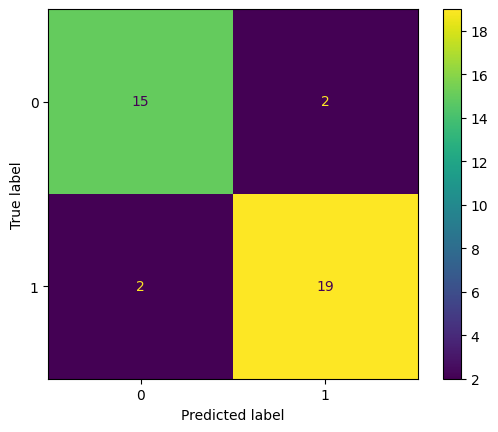

In [67]:
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=rf.classes_)
disp.plot()

Determinados la exhaustividad(recall), la precision y la exactitud(accuracy)

In [68]:
rs = recall_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

print(f'Recall: {rs}')
print(f'Precision: {ps}')
print(f'Accuracy: {ac}')

Recall: 0.9047619047619048
Precision: 0.9047619047619048
Accuracy: 0.8947368421052632


# Traemos el archivo test

Cargamos el DataFrame

In [69]:
df_2 = pd.read_csv("test.csv")
df_2.head()

,Unnamed: 0,Destination,Destination_Code,Origin,Origin_Code,1990,1995,2000,2005,2010,2015,2020,1990.1,1995.1,2000.1,2005.1,2010.1,2015.1,2020.1,1990.2,1995.2,2000.2,2005.2,2010.2,2015.2,2020.2
0,0,Developedregions,901,Developedregions,901,40596772,42606608,44694341,46647063,50408479,52146178,58447543,19075228,19945831,20829785,21759488,23323249,24135021,27404141,21521544,22660777,23864556,24887575,27085230,28011157,31043402
1,1,Developedregions,901,Lessdevelopedregions,902,37973694,47033770,56246319,66440897,76772235,84353343,92975532,19194952,23761617,28401483,33400745,38267783,41622923,45777485,18778742,23272153,27844836,33040152,38504452,42730420,47198047
2,2,Developedregions,901,Lessdevelopedregions,902,934,35675359,44160544,52762010,61933127,71295205,77602538,84780609,17976503,22240122,26557448,31034532,35410010,38153452,41510877,17698856,21920422,26204562,30898595,35885195,39449086
3,3,Developedregions,901,Lessdevelopedregions,902,948,35982218,44381032,52846610,62020715,71498918,77968122,86547616,18210987,22454747,26739655,31264075,35755546,38607393,42759145,17771231,21926285,26106955,30756640,35743372,39360729
4,4,Developedregions,901,Leastdevelopedcountries,941,2298335,2873226,3484309,4507770,5477030,6750805,8194923,1218449,1521495,1844035,2366213,2857773,3469471,4266608,1079886,1351731,1640274,2141557,2619257,3281334,3928315


In [70]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3045 entries, 0 to 3044
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        3045 non-null   int64 
 1   Destination       3045 non-null   object
 2   Destination_Code  3045 non-null   int64 
 3   Origin            3045 non-null   object
 4   Origin_Code       3045 non-null   int64 
 5   1990              3045 non-null   object
 6   1995              3045 non-null   int64 
 7   2000              3045 non-null   int64 
 8   2005              3045 non-null   int64 
 9   2010              3045 non-null   int64 
 10  2015              3045 non-null   int64 
 11  2020              3045 non-null   int64 
 12  1990.1            3045 non-null   int64 
 13  1995.1            3045 non-null   int64 
 14  2000.1            3045 non-null   int64 
 15  2005.1            3045 non-null   int64 
 16  2010.1            3045 non-null   int64 
 17  2015.1        

Realizamos las mismas transformaciones que realizamos para el train

# df_2 Modelo tests - Preprocesamiento de datos utilizando la columna 2020.2 y 2015.2

Importamos los modulos a utilizar

In [71]:
df_2.head()

,Unnamed: 0,Destination,Destination_Code,Origin,Origin_Code,1990,1995,2000,2005,2010,2015,2020,1990.1,1995.1,2000.1,2005.1,2010.1,2015.1,2020.1,1990.2,1995.2,2000.2,2005.2,2010.2,2015.2,2020.2
0,0,Developedregions,901,Developedregions,901,40596772,42606608,44694341,46647063,50408479,52146178,58447543,19075228,19945831,20829785,21759488,23323249,24135021,27404141,21521544,22660777,23864556,24887575,27085230,28011157,31043402
1,1,Developedregions,901,Lessdevelopedregions,902,37973694,47033770,56246319,66440897,76772235,84353343,92975532,19194952,23761617,28401483,33400745,38267783,41622923,45777485,18778742,23272153,27844836,33040152,38504452,42730420,47198047
2,2,Developedregions,901,Lessdevelopedregions,902,934,35675359,44160544,52762010,61933127,71295205,77602538,84780609,17976503,22240122,26557448,31034532,35410010,38153452,41510877,17698856,21920422,26204562,30898595,35885195,39449086
3,3,Developedregions,901,Lessdevelopedregions,902,948,35982218,44381032,52846610,62020715,71498918,77968122,86547616,18210987,22454747,26739655,31264075,35755546,38607393,42759145,17771231,21926285,26106955,30756640,35743372,39360729
4,4,Developedregions,901,Leastdevelopedcountries,941,2298335,2873226,3484309,4507770,5477030,6750805,8194923,1218449,1521495,1844035,2366213,2857773,3469471,4266608,1079886,1351731,1640274,2141557,2619257,3281334,3928315


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

In [73]:
import math
valores = [-math.inf,20000000,30000000, math.inf]
category= ['low','medium','high']
df_2= df_2.assign(p2_target= pd.cut(x=df_2["2000"], bins=valores, labels=category, include_lowest=True))
df_2

,Unnamed: 0,Destination,Destination_Code,Origin,Origin_Code,1990,1995,2000,2005,2010,2015,2020,1990.1,1995.1,2000.1,2005.1,2010.1,2015.1,2020.1,1990.2,1995.2,2000.2,2005.2,2010.2,2015.2,2020.2,p2_target
0,0,Developedregions,901,Developedregions,901,40596772,42606608,44694341,46647063,50408479,52146178,58447543,19075228,19945831,20829785,21759488,23323249,24135021,27404141,21521544,22660777,23864556,24887575,27085230,28011157,31043402,high
1,1,Developedregions,901,Lessdevelopedregions,902,37973694,47033770,56246319,66440897,76772235,84353343,92975532,19194952,23761617,28401483,33400745,38267783,41622923,45777485,18778742,23272153,27844836,33040152,38504452,42730420,47198047,high
2,2,Developedregions,901,Lessdevelopedregions,902,934,35675359,44160544,52762010,61933127,71295205,77602538,84780609,17976503,22240122,26557448,31034532,35410010,38153452,41510877,17698856,21920422,26204562,30898595,35885195,39449086,high
3,3,Developedregions,901,Lessdevelopedregions,902,948,35982218,44381032,52846610,62020715,71498918,77968122,86547616,18210987,22454747,26739655,31264075,35755546,38607393,42759145,17771231,21926285,26106955,30756640,35743372,39360729,high
4,4,Developedregions,901,Leastdevelopedcountries,941,2298335,2873226,3484309,4507770,5477030,6750805,8194923,1218449,1521495,1844035,2366213,2857773,3469471,4266608,1079886,1351731,1640274,2141557,2619257,3281334,3928315,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,3040,Lowincomecountries,1500,Samoa,882,0,0,0,0,0,28,25,0,0,0,0,0,17,16,0,0,0,0,0,11,9,low
3041,3041,Lowincomecountries,1500,Tokelau,772,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,low
3042,3042,Lowincomecountries,1500,Tonga,776,0,0,0,0,0,972,932,0,0,0,0,0,566,546,0,0,0,0,0,406,386,low
3043,3043,Lowincomecountries,1500,Tuvalu,798,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,low


In [74]:
df_2["target"] = df_2['p2_target'].apply(lambda x : 0 if x=='low' else 1)
df_2

,Unnamed: 0,Destination,Destination_Code,Origin,Origin_Code,1990,1995,2000,2005,2010,2015,2020,1990.1,1995.1,2000.1,2005.1,2010.1,2015.1,2020.1,1990.2,1995.2,2000.2,2005.2,2010.2,2015.2,2020.2,p2_target,target
0,0,Developedregions,901,Developedregions,901,40596772,42606608,44694341,46647063,50408479,52146178,58447543,19075228,19945831,20829785,21759488,23323249,24135021,27404141,21521544,22660777,23864556,24887575,27085230,28011157,31043402,high,1
1,1,Developedregions,901,Lessdevelopedregions,902,37973694,47033770,56246319,66440897,76772235,84353343,92975532,19194952,23761617,28401483,33400745,38267783,41622923,45777485,18778742,23272153,27844836,33040152,38504452,42730420,47198047,high,1
2,2,Developedregions,901,Lessdevelopedregions,902,934,35675359,44160544,52762010,61933127,71295205,77602538,84780609,17976503,22240122,26557448,31034532,35410010,38153452,41510877,17698856,21920422,26204562,30898595,35885195,39449086,high,1
3,3,Developedregions,901,Lessdevelopedregions,902,948,35982218,44381032,52846610,62020715,71498918,77968122,86547616,18210987,22454747,26739655,31264075,35755546,38607393,42759145,17771231,21926285,26106955,30756640,35743372,39360729,high,1
4,4,Developedregions,901,Leastdevelopedcountries,941,2298335,2873226,3484309,4507770,5477030,6750805,8194923,1218449,1521495,1844035,2366213,2857773,3469471,4266608,1079886,1351731,1640274,2141557,2619257,3281334,3928315,low,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,3040,Lowincomecountries,1500,Samoa,882,0,0,0,0,0,28,25,0,0,0,0,0,17,16,0,0,0,0,0,11,9,low,0
3041,3041,Lowincomecountries,1500,Tokelau,772,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,low,0
3042,3042,Lowincomecountries,1500,Tonga,776,0,0,0,0,0,972,932,0,0,0,0,0,566,546,0,0,0,0,0,406,386,low,0
3043,3043,Lowincomecountries,1500,Tuvalu,798,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,low,0


In [75]:
import math
valores = [-math.inf,30000000,40000000, math.inf]
category= ['low','medium','high']
df_2= df_2.assign(lustro15= pd.cut(x=df_2["2015"], bins=valores, labels=category, include_lowest=True))
df_2

,Unnamed: 0,Destination,Destination_Code,Origin,Origin_Code,1990,1995,2000,2005,2010,2015,2020,1990.1,1995.1,2000.1,2005.1,2010.1,2015.1,2020.1,1990.2,1995.2,2000.2,2005.2,2010.2,2015.2,2020.2,p2_target,target,lustro15
0,0,Developedregions,901,Developedregions,901,40596772,42606608,44694341,46647063,50408479,52146178,58447543,19075228,19945831,20829785,21759488,23323249,24135021,27404141,21521544,22660777,23864556,24887575,27085230,28011157,31043402,high,1,high
1,1,Developedregions,901,Lessdevelopedregions,902,37973694,47033770,56246319,66440897,76772235,84353343,92975532,19194952,23761617,28401483,33400745,38267783,41622923,45777485,18778742,23272153,27844836,33040152,38504452,42730420,47198047,high,1,high
2,2,Developedregions,901,Lessdevelopedregions,902,934,35675359,44160544,52762010,61933127,71295205,77602538,84780609,17976503,22240122,26557448,31034532,35410010,38153452,41510877,17698856,21920422,26204562,30898595,35885195,39449086,high,1,high
3,3,Developedregions,901,Lessdevelopedregions,902,948,35982218,44381032,52846610,62020715,71498918,77968122,86547616,18210987,22454747,26739655,31264075,35755546,38607393,42759145,17771231,21926285,26106955,30756640,35743372,39360729,high,1,high
4,4,Developedregions,901,Leastdevelopedcountries,941,2298335,2873226,3484309,4507770,5477030,6750805,8194923,1218449,1521495,1844035,2366213,2857773,3469471,4266608,1079886,1351731,1640274,2141557,2619257,3281334,3928315,low,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,3040,Lowincomecountries,1500,Samoa,882,0,0,0,0,0,28,25,0,0,0,0,0,17,16,0,0,0,0,0,11,9,low,0,low
3041,3041,Lowincomecountries,1500,Tokelau,772,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,low,0,low
3042,3042,Lowincomecountries,1500,Tonga,776,0,0,0,0,0,972,932,0,0,0,0,0,566,546,0,0,0,0,0,406,386,low,0,low
3043,3043,Lowincomecountries,1500,Tuvalu,798,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,low,0,low


In [76]:
df_2['B15'] = df_2['lustro15'].apply(lambda x : 0 if x=='low' else 1)
df_2

,Unnamed: 0,Destination,Destination_Code,Origin,Origin_Code,1990,1995,2000,2005,2010,2015,2020,1990.1,1995.1,2000.1,2005.1,2010.1,2015.1,2020.1,1990.2,1995.2,2000.2,2005.2,2010.2,2015.2,2020.2,p2_target,target,lustro15,B15
0,0,Developedregions,901,Developedregions,901,40596772,42606608,44694341,46647063,50408479,52146178,58447543,19075228,19945831,20829785,21759488,23323249,24135021,27404141,21521544,22660777,23864556,24887575,27085230,28011157,31043402,high,1,high,1
1,1,Developedregions,901,Lessdevelopedregions,902,37973694,47033770,56246319,66440897,76772235,84353343,92975532,19194952,23761617,28401483,33400745,38267783,41622923,45777485,18778742,23272153,27844836,33040152,38504452,42730420,47198047,high,1,high,1
2,2,Developedregions,901,Lessdevelopedregions,902,934,35675359,44160544,52762010,61933127,71295205,77602538,84780609,17976503,22240122,26557448,31034532,35410010,38153452,41510877,17698856,21920422,26204562,30898595,35885195,39449086,high,1,high,1
3,3,Developedregions,901,Lessdevelopedregions,902,948,35982218,44381032,52846610,62020715,71498918,77968122,86547616,18210987,22454747,26739655,31264075,35755546,38607393,42759145,17771231,21926285,26106955,30756640,35743372,39360729,high,1,high,1
4,4,Developedregions,901,Leastdevelopedcountries,941,2298335,2873226,3484309,4507770,5477030,6750805,8194923,1218449,1521495,1844035,2366213,2857773,3469471,4266608,1079886,1351731,1640274,2141557,2619257,3281334,3928315,low,0,low,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,3040,Lowincomecountries,1500,Samoa,882,0,0,0,0,0,28,25,0,0,0,0,0,17,16,0,0,0,0,0,11,9,low,0,low,0
3041,3041,Lowincomecountries,1500,Tokelau,772,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,low,0,low,0
3042,3042,Lowincomecountries,1500,Tonga,776,0,0,0,0,0,972,932,0,0,0,0,0,566,546,0,0,0,0,0,406,386,low,0,low,0
3043,3043,Lowincomecountries,1500,Tuvalu,798,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,low,0,low,0


In [77]:
import math
valores = [-math.inf,30000000,40000000, math.inf]
category= ['low','medium','high']
df_2= df_2.assign(lustro20= pd.cut(x=df_2["2020.2"], bins=valores, labels=category, include_lowest=True))
df_2

,Unnamed: 0,Destination,Destination_Code,Origin,Origin_Code,1990,1995,2000,2005,2010,2015,2020,1990.1,1995.1,2000.1,2005.1,2010.1,2015.1,2020.1,1990.2,1995.2,2000.2,2005.2,2010.2,2015.2,2020.2,p2_target,target,lustro15,B15,lustro20
0,0,Developedregions,901,Developedregions,901,40596772,42606608,44694341,46647063,50408479,52146178,58447543,19075228,19945831,20829785,21759488,23323249,24135021,27404141,21521544,22660777,23864556,24887575,27085230,28011157,31043402,high,1,high,1,medium
1,1,Developedregions,901,Lessdevelopedregions,902,37973694,47033770,56246319,66440897,76772235,84353343,92975532,19194952,23761617,28401483,33400745,38267783,41622923,45777485,18778742,23272153,27844836,33040152,38504452,42730420,47198047,high,1,high,1,high
2,2,Developedregions,901,Lessdevelopedregions,902,934,35675359,44160544,52762010,61933127,71295205,77602538,84780609,17976503,22240122,26557448,31034532,35410010,38153452,41510877,17698856,21920422,26204562,30898595,35885195,39449086,high,1,high,1,medium
3,3,Developedregions,901,Lessdevelopedregions,902,948,35982218,44381032,52846610,62020715,71498918,77968122,86547616,18210987,22454747,26739655,31264075,35755546,38607393,42759145,17771231,21926285,26106955,30756640,35743372,39360729,high,1,high,1,medium
4,4,Developedregions,901,Leastdevelopedcountries,941,2298335,2873226,3484309,4507770,5477030,6750805,8194923,1218449,1521495,1844035,2366213,2857773,3469471,4266608,1079886,1351731,1640274,2141557,2619257,3281334,3928315,low,0,low,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,3040,Lowincomecountries,1500,Samoa,882,0,0,0,0,0,28,25,0,0,0,0,0,17,16,0,0,0,0,0,11,9,low,0,low,0,low
3041,3041,Lowincomecountries,1500,Tokelau,772,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,low,0,low,0,low
3042,3042,Lowincomecountries,1500,Tonga,776,0,0,0,0,0,972,932,0,0,0,0,0,566,546,0,0,0,0,0,406,386,low,0,low,0,low
3043,3043,Lowincomecountries,1500,Tuvalu,798,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,low,0,low,0,low


In [78]:
df_2['B20'] = df_2['lustro20'].apply(lambda x : 0 if x=='low' else 1)
df_2

,Unnamed: 0,Destination,Destination_Code,Origin,Origin_Code,1990,1995,2000,2005,2010,2015,2020,1990.1,1995.1,2000.1,2005.1,2010.1,2015.1,2020.1,1990.2,1995.2,2000.2,2005.2,2010.2,2015.2,2020.2,p2_target,target,lustro15,B15,lustro20,B20
0,0,Developedregions,901,Developedregions,901,40596772,42606608,44694341,46647063,50408479,52146178,58447543,19075228,19945831,20829785,21759488,23323249,24135021,27404141,21521544,22660777,23864556,24887575,27085230,28011157,31043402,high,1,high,1,medium,1
1,1,Developedregions,901,Lessdevelopedregions,902,37973694,47033770,56246319,66440897,76772235,84353343,92975532,19194952,23761617,28401483,33400745,38267783,41622923,45777485,18778742,23272153,27844836,33040152,38504452,42730420,47198047,high,1,high,1,high,1
2,2,Developedregions,901,Lessdevelopedregions,902,934,35675359,44160544,52762010,61933127,71295205,77602538,84780609,17976503,22240122,26557448,31034532,35410010,38153452,41510877,17698856,21920422,26204562,30898595,35885195,39449086,high,1,high,1,medium,1
3,3,Developedregions,901,Lessdevelopedregions,902,948,35982218,44381032,52846610,62020715,71498918,77968122,86547616,18210987,22454747,26739655,31264075,35755546,38607393,42759145,17771231,21926285,26106955,30756640,35743372,39360729,high,1,high,1,medium,1
4,4,Developedregions,901,Leastdevelopedcountries,941,2298335,2873226,3484309,4507770,5477030,6750805,8194923,1218449,1521495,1844035,2366213,2857773,3469471,4266608,1079886,1351731,1640274,2141557,2619257,3281334,3928315,low,0,low,0,low,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,3040,Lowincomecountries,1500,Samoa,882,0,0,0,0,0,28,25,0,0,0,0,0,17,16,0,0,0,0,0,11,9,low,0,low,0,low,0
3041,3041,Lowincomecountries,1500,Tokelau,772,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,low,0,low,0,low,0
3042,3042,Lowincomecountries,1500,Tonga,776,0,0,0,0,0,972,932,0,0,0,0,0,566,546,0,0,0,0,0,406,386,low,0,low,0,low,0
3043,3043,Lowincomecountries,1500,Tuvalu,798,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,low,0,low,0,low,0


Obtenemos los stop words de esta biblioteca

In [79]:
sw = nltk.corpus.stopwords.words('spanish')

Nos quedamos con la lista de los textos de las descripciones

In [80]:
corpus = df_2['p2_target']

Lo convertimos a lista

In [81]:
corpus = list(corpus)

Instanciamos el vectorizador con los stop words y un máximo de features de 1000

In [82]:
vectorizer = TfidfVectorizer(stop_words=sw, max_features=1000)

Vectorizamos los datos

In [83]:
x = vectorizer.fit_transform(corpus)

Vemos la cantidad de datos obtenidos

In [84]:
x.shape

(3045, 3)

Obtenemos la variable objetivo

In [96]:
y = df_2['B15']

Dimension de la variable objetivo

In [97]:
y.shape

(3045,)

Importamos las librerias necesarias

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer 
import joblib

In [99]:
pipe_rf = Pipeline([('rf', RandomForestClassifier(n_estimators=50, random_state=0)),])

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [101]:
pipe_rf.fit(x_train, y_train)

Pipeline(steps=[('rf',
                 RandomForestClassifier(n_estimators=50, random_state=0))])

Guardamos el Pipeline en un archivo Pickle

In [102]:
joblib.dump(pipe_rf, 'modelo_random_forest2.pkl', compress=1)

['modelo_random_forest2.pkl']

Cargamos el archivo creado de nuestro modelo

In [103]:
rf = joblib.load('modelo_random_forest2.pkl')

Ajustamos el umbral de puntuacion (Adjust Score Threshold): Ajustar este valor cambia el nivel de confianza que debe tener el modelo en una predicción antes de considerar que la predicción es positiva. También cambia la cantidad de falsos negativos y falsos positivos que está dispuesto a tolerar en sus predicciones.

In [104]:
y_pred = np.where(rf.predict_proba(x_test) [:,1] > 0.2, 1, 0)

Generamos una matriz de confusion

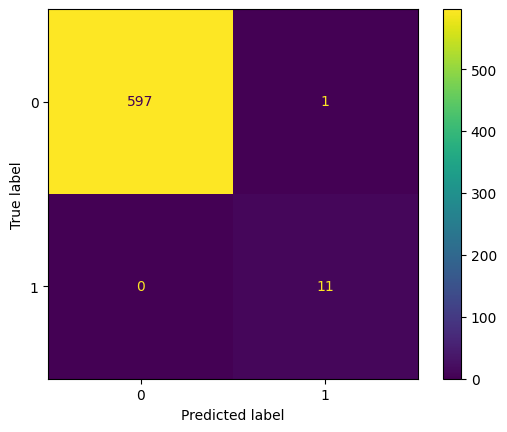

In [105]:
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=rf.classes_)
disp.plot()

Determinados la exhaustividad(recall), la precision y la exactitud(accuracy)

In [106]:
rs = recall_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

print(f'Recall: {rs}')
print(f'Precision: {ps}')
print(f'Accuracy: {ac}')

Recall: 1.0
Precision: 0.9166666666666666
Accuracy: 0.9983579638752053


In [109]:
#Se define la tabla test ha utilizar
test= df_2
test.head(4)

,Unnamed: 0,Destination,Destination_Code,Origin,Origin_Code,1990,1995,2000,2005,2010,2015,2020,1990.1,1995.1,2000.1,2005.1,2010.1,2015.1,2020.1,1990.2,1995.2,2000.2,2005.2,2010.2,2015.2,2020.2,p2_target,target,lustro15,B15,lustro20,B20
0,0,Developedregions,901,Developedregions,901,40596772,42606608,44694341,46647063,50408479,52146178,58447543,19075228,19945831,20829785,21759488,23323249,24135021,27404141,21521544,22660777,23864556,24887575,27085230,28011157,31043402,high,1,high,1,medium,1
1,1,Developedregions,901,Lessdevelopedregions,902,37973694,47033770,56246319,66440897,76772235,84353343,92975532,19194952,23761617,28401483,33400745,38267783,41622923,45777485,18778742,23272153,27844836,33040152,38504452,42730420,47198047,high,1,high,1,high,1
2,2,Developedregions,901,Lessdevelopedregions,902,934,35675359,44160544,52762010,61933127,71295205,77602538,84780609,17976503,22240122,26557448,31034532,35410010,38153452,41510877,17698856,21920422,26204562,30898595,35885195,39449086,high,1,high,1,medium,1
3,3,Developedregions,901,Lessdevelopedregions,902,948,35982218,44381032,52846610,62020715,71498918,77968122,86547616,18210987,22454747,26739655,31264075,35755546,38607393,42759145,17771231,21926285,26106955,30756640,35743372,39360729,high,1,high,1,medium,1


Preparamos la columna description para utilizarla 

In [116]:
# Vemos descripciones faltantes en la columna P2
test['p2_target'].isnull().sum()

0

In [117]:
# Obtenemos los índices de los registros con descripciones vacías
sin_desc = df_2[test.p2_target.isnull()].index
sin_desc

Int64Index([], dtype='int64')

In [118]:
# Obtenemos los stop words de esta biblioteca 
sw = nltk.corpus.stopwords.words('spanish')

In [120]:
# Nos quedamos con P2
corpus_t = test['p2_target']

In [121]:
# Lo convertimos a lista
corpus_t = list(corpus_t)

In [122]:
# Verificamos el tamaño de los datos obtendos, para observar que coincide 
# con la cantidad de registros a predecir
len(corpus_t)

3045

Se realiza la modelizacion 

In [123]:
# Instanciamos el vectorizador con los stop words y un máximo de features de 1000
vectorizer_t = TfidfVectorizer(stop_words=sw, max_features=3)

In [124]:
# Vectorizamos los datos
x_t = vectorizer_t.fit_transform(corpus_t)

In [125]:
#Observamos la cantidad de datos obtenidos
x_t.shape

(3045, 3)

In [126]:
#Ajustamos el umbral de puntuacion (Adjust Score Threshold)
y_t_predict = np.where(rf.predict_proba(x_t) [:,1] > 0.2, 1, 0)

# Generación del CSV

Creamos el DataFrame que contendrá las predicciones obtenidas

In [127]:
datos = pd.DataFrame()

Creamos la columna pred con los datos obtendiso de la predicción

In [128]:
datos['pred'] = y_t_predict

Lo guardamos con formato CSV

In [129]:
datos.to_csv('Armegas.csv', index=False)